In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import matplotlib.colors as mcolors




In [2]:
# mapping_dict=adata_i.obs["annotation"].to_dict()

In [3]:
import os
os.listdir('/nfs/team298/ls34/new_disease_atlas/model_scanvi5_Wound_5846/')

['adata_mappedonly_notatlas.h5ad.counts.annotated',
 'adata_mappedonly_notatlas.h5ad.counts.annotated3',
 'adata_mappedonly_notatlas.h5ad.counts',
 'adata.h5ad',
 'adata_mappedonly_notatlas.h5ad.counts.annotated3.backup.counts',
 'adata_mappedonly_notatlas.h5ad.counts.annotated2',
 'model.pt',
 'adata_mappedonly_notatlas.h5ad.counts.annotated3.backup',
 'adata_all_scvi5.h5ad.countsonly']

In [4]:
adata_i=sc.read_h5ad('/nfs/team298/ls34/new_disease_atlas/model_scanvi5_Wound_5846/adata_mappedonly_notatlas.h5ad.counts.annotated3')
adata_i.shape

(11623, 36454)

In [5]:
adata_i.obs.Time.value_counts()

Time
Day30       5507
Day7        3827
Baseline    1268
Day1        1021
Name: count, dtype: int64

In [6]:
# adata_i.X[5,:5].A

In [7]:
# sc.pp.neighbors(adata_i, n_neighbors=20, use_rep="X_scvi")
# print("neighbors calculated")
# #RES=1


In [8]:
# sc.tl.umap(adata_i, min_dist=0.1)
# print("start leiden")
# #sc.tl.leiden(adata_ii, resolution=RES, random_state=1, key_added="test2")

In [9]:
#mapping_dict

In [10]:
# adata_i.obs["annotation"] = adata_i.obs.index.map(mapping_dict).fillna("Nonfb")
# adata_i.obs["annotation"] .value_counts()

In [11]:
# adata_i=adata_i[adata_i.obs["annotation"]!="Nonfb"]

In [12]:

# sc.pl.umap(
#     adata_i,
#     color='annotation',
#     show=True,
#     frameon=False,
#     legend_loc=None,
#     legend_fontsize=15,
#     s=70,
#     title='',
#     legend_fontoutline=2,
#     #save="wounds_umap.pdf",
#     edgecolor='grey', 
#     linewidth=.05
# )


In [13]:
# adata_i.write('/nfs/team298/ls34/new_disease_atlas/model_scanvi5_Wound_5846/adata_mappedonly_notatlas.h5ad.counts.annotated3.backup.counts')


In [14]:
# adata_i.write('/nfs/team298/ls34/new_disease_atlas/model_scanvi5_Wound_5846/adata_mappedonly_notatlas.h5ad.counts.annotated3.backup')


In [15]:
# adata_i

In [16]:
# adata_i.obs["annotation"].unique()

In [17]:
# RENAME = { 'F2/3: Stroma_PPARG+':  'F2/3: Perivascular', 
#           'F6: Myofibroblast': 'F7: Myofibroblast',
         
#          }
# adata_i.obs["annotation"] =adata_i.obs["annotation"].map(RENAME).fillna(adata_i.obs["annotation"])

In [18]:
# ORDER = [
#     'F1: Superficial', 'F2: Universal', 'F2/3: Perivascular', 'F3: FRC-like',
#     'F4: DS_DPEP1+', 'F4: TNN+COCH+', 'F5: RAMP1+', 'F5: NGFR+', 
#     'F6: Inflammatory myofibroblast', 'F7: Myofibroblast'
# ]
# adata_i.obs["annotation"] = pd.Categorical(adata_i.obs["annotation"], categories=ORDER, ordered=True)

In [19]:
# adata_i.write('/nfs/team298/ls34/new_disease_atlas/model_scanvi5_Wound_5846/adata_mappedonly_notatlas.h5ad.counts.annotated3')


In [20]:
sc.settings.figdir = "fig5"

In [21]:
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(14, 14))

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [22]:
pickle_file_path = '/nfs/team298/ls34/fb_dict.pkl'

with open(pickle_file_path, 'rb') as file:
    reynolds_short_final = pickle.load(file)


    # List of values to remove
values_to_remove = {"SFRP2", "CTHRC1", "HLA-DRA", "NRG3", "MKX", "RELN", "SFRP4", "CDH19",}

# Remove unwanted values from each list
reynolds_short_final = {
    k: [gene for gene in v if gene not in values_to_remove]
    for k, v in reynolds_short_final.items()
}
reynolds_short_final = {k: v for k, v in reynolds_short_final.items() if k != "F4: DP_HHIP+"}
# Print result to verify

pickle_file_path = '/nfs/team298/ls34/fb_dict_lesional.pkl'

with open(pickle_file_path, 'rb') as file:
    LESIONAL = pickle.load(file)
ALL_GENES_NOF8 = {k: v for k, v in LESIONAL.items() if k != "F8"}
ALL_GENES_NOF8 = {k: v for k, v in ALL_GENES_NOF8.items() if k != "F3"}
ALL_GENES_NOF8 = {k: v for k, v in ALL_GENES_NOF8.items() if k != "F1"}

In [23]:
values_to_remove = {"COMP", "COL11A1", "ASPN", 'CREB3L1', "MKX", "RELN", "SFRP4", "CDH19", "COMP", 'CTHRC1',
  'CCN4', "KCNMA1" }

# Remove unwanted values from each list
ALL_GENES_NOF8 = {
    k: [gene for gene in v if gene not in values_to_remove]
    for k, v in ALL_GENES_NOF8.items()
}

In [24]:
WOUND_GENES = reynolds_short_final | ALL_GENES_NOF8

In [25]:
# reynolds_short_final IS:
    
#     {'F1': ['APCDD1',
#   'COL18A1',
#   'COL23A1',
#   'COL13A1',
#   'COMP',
#   'NKD2',
#   'RSPO1',
#   'AXIN2',
#   'WIF1',
#   'SFRP2'],
#  'F2: Universal': ['CD34',
#   'PI16',
#   'DPP4',
#   'MFAP5',
#   'PCOLCE2',
#   'CTHRC1',
#   'SLPI',
#   'CD70',
#   'LGR5'],
#  'F2/3: Bridge': ['CXCL12',
#   'APOE',
#   'EFEMP1',
#   'APOC1',
#   'C7',
#   'PLA2G2A',
#   'PPARG',
#   'MYOC',
#   'GDF10'],
#  'F3': ['CCL19',
#   'CD74',
#   'CH25H',
#   'TNFSF13B',
#   'IL33',
#   'IRF8',
#   'IL15',
#   'VCAM1',
#   'HLA-DRA',
#   'HLA-DRB1'],
#  'F4': ['ASPN', 'COL11A1'],
#  'F4: DS_DPEP1+': ['MEF2C', 'DPEP1', 'MYL4'],
#  'F4: TNN+COCH+': ['TNN',
#   'COCH',
#   'CRABP1',
#   'COL24A1',
#   'RSPO4',
#   'SLITRK6',
#   'NRG3',
#   'MKX',
#   'TNMD'],
#  'F4: DP_HHIP+': ['CORIN',
#   'BMP7',
#   'WNT5A',
#   'LEF1',
#   'HHIP',
#   'RSPO3',
#   'INHBA',
#   'PTCH1'],
#  'F5': ['SCN7A', 'FMO2', 'FGFBP2', 'OLFML2A', 'PEAR1'],
#  'F5: RAMP1+': ['RAMP1', 'RELN', 'PLEKHA6', 'IGFBP2', 'SFRP1'],
#  'F5: NGFR+': ['EBF2', 'NGFR', 'SFRP4', 'ITGA6', 'CDH19', 'CLDN1']}
    
#     . HOW CAN I WRITE CODE TO REMOVE THE VALUES "SFRP2", "CTHRC1", "HLA-DRA", "NRG3","MKX","RELN", "SFRP4". "CDH19"

In [26]:
# file_path = '/nfs/team298/ls34/fb_dict_lesional.pkl'

# with open(file_path, 'rb') as file:
#     LESIONAL_GENES_VSHORT5 = pickle.load(file)

# print("Dictionary successfully loaded!")






/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(

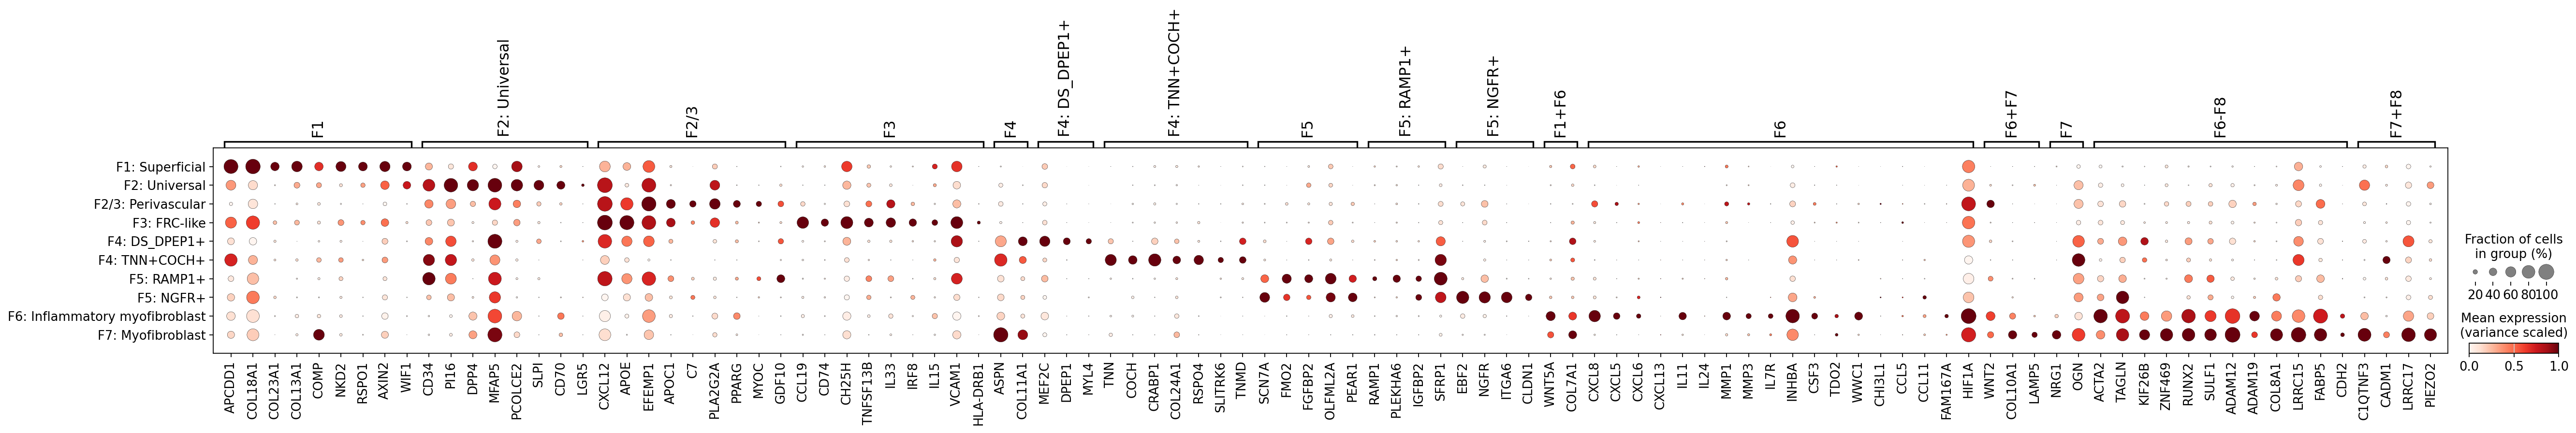

In [27]:
# ALL_GENES_NOF8 = {'F1': ['APCDD1',
#   'COL18A1',
#   'COL23A1',
#   'COL13A1',
#   #'COMP',
#   'NKD2',
#   'RSPO1',
#   'AXIN2',
#   'WIF1',
# #  'SFRP2',
#                          'CRABP1',
#   'TNFRSF21',
#   #'CXCL1', "IGFBP2", "PDE4B", "GGT5", "GUCY1A1"
#                   ],
#  'F2: Universal': ['CD34',
#   'PI16',
#   'DPP4',
#   'MFAP5',
#   'PCOLCE2',
#  # 'CTHRC1',
#   'SLPI',
#   'CD70',
#   'LGR5'],
#  'F2/3: Bridge': ['CXCL12',
#   'APOE',
#   #'EFEMP1',
#   'APOC1',
#   'C7',
#   'PLA2G2A',
#   'PPARG',
#   'MYOC',
#   'GDF10'],
#  'F3': ['CCL19',
#   'CD74',
#   'CH25H',
#   'TNFSF13B',
#   'IL33',
#   'IRF8',
#   'IL15',
#   #'VCAM1',
#   'HLA-DRA',
#  # 'HLA-DRB1'
#         'ADAMDEC1', 'CXCL9'], 
#  'F4: DS_DPEP1+': [#'MEF2C',
#      'DPEP1', 'MYL4'],
#  'F4: TNN+COCH+': ['TNN',
#   'COCH',
#   #'CRABP1',
#   #'COL24A1',
#   'RSPO4',
#   #'SLITRK6',
#   #'NRG3',
#   'MKX',
#  # 'TNMD'
#                   ],
# #  'F4: DP_HHIP+': ['CORIN',
# #   'BMP7',
# #   'WNT5A',
# #   'LEF1',
# #   'HHIP',
# #   'RSPO3',
# #   'INHBA',
# #   'PTCH1'],
#  'F5': ['SCN7A', 'FMO2', #'FGFBP2', 'OLFML2A', 'PEAR1'
#        ],
#  'F5+: RAMP1': ['RAMP1', 'RELN', #'PLEKHA6',# 'IGFBP2', #'SFRP1'
#                ],
#  'F5: NGFR+': ['EBF2', 'NGFR','ITGA6', #'CDH19', #'CLDN1'
#               ],
#                   'F1+F6': ['WNT5A', 'COL7A1'],
#  'F6': ['CXCL8',
#   'CXCL5',
#   'CXCL6',
#   'CXCL13',
#   'IL11',
#   'IL24',
#   'MMP1',
#   'MMP3',
#   'IL7R',
#   'INHBA',
#   'CSF3',
#   'TDO2',
#   'WWC1',
#   'CHI3L1',
#   'CCL5',
#   'CCL11',
#   'HIF1A'],
#  'F6+F7': ['WNT2', 'COL10A1', 'LAMP5'],
#  'F7': ['NRG1', 'OGN'],
#                           "F6-8": [ "ACTA2", "TAGLN","ASPN", 'COMP', "COL11A1",
    
                                          
#                                           # "MYH9" 
#                          "KIF26B",  "ZNF469", # "GUCY1A2",  
#                             "RUNX2",#  "ADAMTS14",
#                                       "SULF1",
#                                   "ADAM12",  "COL8A1", "LRRC15", "CREB3L1","CTHRC1", "CCN4", "FABP5",     "CDH2"],
                              
                          
#                 "F7+F8": ["C1QTNF3", "CADM1",      "LRRC17",   # "SCX" ,
#                                    "PIEZO2" ,  "SFRP4",  "KCNMA1", ],#"FAT3",
                       
#  'F7+F8': ['C1QTNF3', 'CADM1', 'LRRC17', 'PIEZO2', 'SFRP4', 'KCNMA1'],
 
#                  }




sc.pl.dotplot(
    adata_i,
    WOUND_GENES,
    groupby=f'annotation',
    #vmax=1.1,
    colorbar_title='Mean expression\n(variance scaled)', 
   standard_scale="var",
    dendrogram=False,
    save="5e_dotplot_wounds.pdf"
)



In [28]:
# sc.pl.dotplot(
#     adata_i,
#     reynolds_short_final,
#     groupby=f'annotation',
#     #vmax=1.1,
#     colorbar_title='Mean expression\n(variance scaled)', 
#    standard_scale="var",
#     dendrogram=False,
#    # save="dotplot_wounds.pdf"
# )



In [29]:
import pickle

# Define the file path
file_path = '/nfs/team298/ls34/fb_dict_lesional_FORWOUND.pkl'

# Save the dictionary
with open(file_path, 'wb') as file:
    pickle.dump(WOUND_GENES, file)

print(f"Dictionary saved to {file_path}")

Dictionary saved to /nfs/team298/ls34/fb_dict_lesional_FORWOUND.pkl


In [30]:
pickle_file_path = '/nfs/team298/ls34/fb_dict.pkl'

with open(pickle_file_path, 'rb') as file:
    reynolds_short_final = pickle.load(file)


    # List of values to remove
values_to_remove = {"SFRP2", "CTHRC1", "HLA-DRA", "NRG3", "MKX", "RELN", "SFRP4", "CDH19",}

# Remove unwanted values from each list
reynolds_short_final = {
    k: [gene for gene in v if gene not in values_to_remove]
    for k, v in reynolds_short_final.items()
}
#reynolds_short_final = {k: v for k, v in reynolds_short_final.items() if k != "F4: DP_HHIP+"}
# Print result to verify

pickle_file_path = '/nfs/team298/ls34/fb_dict_lesional.pkl'

with open(pickle_file_path, 'rb') as file:
    LESIONAL = pickle.load(file)
ALL_GENES_NOF8 = {k: v for k, v in LESIONAL.items() if k != "F8"}
ALL_GENES_NOF8 = {k: v for k, v in ALL_GENES_NOF8.items() if k != "F3"}
ALL_GENES_NOF8 = {k: v for k, v in ALL_GENES_NOF8.items() if k != "F1"}

In [31]:
WOUND_GENES_PLUSDP = reynolds_short_final | ALL_GENES_NOF8

In [32]:
# Define the file paAth
file_path = '/nfs/team298/ls34/fb_dict_lesional_FORWOUND_PLUSDP.pkl'

# Save the dictionary
with open(file_path, 'wb') as file:
    pickle.dump(WOUND_GENES_PLUSDP, file)

print(f"Dictionary saved to {file_path}")

Dictionary saved to /nfs/team298/ls34/fb_dict_lesional_FORWOUND_PLUSDP.pkl


In [33]:
# # Define the file paAth
# file_path = '/nfs/team298/ls34/fb_dict_lesional_FORWOUND_PLUSDP.pkl'

# # Save the dictionary
# with open(file_path, 'wb') as file:
#     pickle.dump(WOUND_GENES_PLUSDP, file)

# print(f"Dictionary saved to {file_path}")

In [34]:
# ALL_GENES_PLUSDP = {'F1': ['APCDD1',
#   'COL18A1',
#   'COL23A1',
#   'COL13A1',
#   #'COMP',
#   'NKD2',
#   'RSPO1',
#   'AXIN2',
#   'WIF1',
# #  'SFRP2',
#                          'CRABP1',
#   'TNFRSF21',
#   #'CXCL1', "IGFBP2", "PDE4B", "GGT5", "GUCY1A1"
#                   ],
#  'F2: Universal': ['CD34',
#   'PI16',
#   'DPP4',
#   'MFAP5',
#   'PCOLCE2',
#  # 'CTHRC1',
#   'SLPI',
#   'CD70',
#   'LGR5'],
#  'F2/3: Bridge': ['CXCL12',
#   'APOE',
#   #'EFEMP1',
#   'APOC1',
#   'C7',
#   'PLA2G2A',
#   'PPARG',
#   'MYOC',
#   'GDF10'],
#  'F3': ['CCL19',
#   'CD74',
#   'CH25H',
#   'TNFSF13B',
#   'IL33',
#   'IRF8',
#   'IL15',
#   #'VCAM1',
#   'HLA-DRA',
#  # 'HLA-DRB1'
#         'ADAMDEC1', 'CXCL9'], 
#  'F4: DS_DPEP1+': [#'MEF2C',
#      'DPEP1', 'MYL4'],
#  'F4: TNN+COCH+': ['TNN',
#   'COCH',
#   #'CRABP1',
#   #'COL24A1',
#   'RSPO4',
#   #'SLITRK6',
#   #'NRG3',
#   'MKX',
#  # 'TNMD'
#                   ],
# #  'F4: DP_HHIP+': ['CORIN',
# #   'BMP7',
# #   'WNT5A',
# #   'LEF1',
# #   'HHIP',
# #   'RSPO3',
# #   'INHBA',
# #   'PTCH1'],
#                     'F4: DP_HHIP+': ['CORIN',
#   'BMP7',
#   #'WNT5A',
#   'LEF1',
#   'HHIP',
#   'RSPO3',
#   #'INHBA',
#   'PTCH1'],

#  'F5': ['SCN7A', 'FMO2', #'FGFBP2', 'OLFML2A', 'PEAR1'
#        ],
#  'F5+: RAMP1': ['RAMP1', 'RELN', #'PLEKHA6',# 'IGFBP2', #'SFRP1'
#                ],
#  'F5: NGFR+': ['EBF2', 'NGFR','ITGA6', #'CDH19', #'CLDN1'
#               ],
#                   'F1+F6': ['WNT5A', 'COL7A1'],
#  'F6': ['CXCL8',
#   'CXCL5',
#   'CXCL6',
#   'CXCL13',
#   'IL11',
#   'IL24',
#   'MMP1',
#   'MMP3',
#   'IL7R',
#   'INHBA',
#   'CSF3',
#   'TDO2',
#   'WWC1',
#   'CHI3L1',
#   'CCL5',
#   'CCL11',
#   'HIF1A'],
#  'F6+F7': ['WNT2', 'COL10A1', 'LAMP5'],
#  'F7': ['NRG1', 'OGN'],
#                           "F6-F8": [ "ACTA2", "TAGLN","ASPN", 'COMP', "COL11A1",
    
                                          
#                                           # "MYH9" 
#                          "KIF26B",  "ZNF469", # "GUCY1A2",  
#                             "RUNX2",#  "ADAMTS14",
#                                       "SULF1",
#                                   "ADAM12",  "COL8A1", "LRRC15", "CREB3L1","CTHRC1", "CCN4", "FABP5",     "CDH2"],
                              
                          
#                 "F7+F8": ["C1QTNF3", "CADM1",      "LRRC17",   # "SCX" ,
#                                    "PIEZO2" ,  "SFRP4",  "KCNMA1", ],#"FAT3",
                       
#  'F7+F8': ['C1QTNF3', 'CADM1', 'LRRC17', 'PIEZO2', 'SFRP4', 'KCNMA1'],
 
#                  }
# import pickle



In [35]:
FBS = {'F1': ['APCDD1',
  'COL18A1',
  'COL23A1',
  'COL13A1',
  'COMP',
  'NKD2',
  'RSPO1',
  'AXIN2',
  'WIF1',
  'SFRP2'],
                   
                 
 'F2: Universal': ['CD34',
  'PI16',
  'DPP4',
  'MFAP5',
  'PCOLCE2',
  'CTHRC1',
  'SLPI',
  'CD70',
  'LGR5'],
 'F2/3: Bridge': ['CXCL12',
  'APOE',
  'EFEMP1',
  'APOC1',
  'C7',
  'PLA2G2A',
  'PPARG',
  'MYOC',
  'GDF10'],
       
 'F3': ['CCL19',
  'CD74',
  'CH25H',
  'TNFSF13B',
  'IL33',
  'IRF8',
  'IL15',
  'VCAM1',
  'HLA-DRA',
  'HLA-DRB1'],
          "Activated F3": ["ADAMDEC1", "CXCL9", "CXCL10"],
 'F4': ['ASPN'],
 'F4: DS_DPEP1+': ['COL11A1', 'MEF2C', 'DPEP1', 'MYL4'],
 'F4: TNN+COCH+': ['TNN',
  'COCH',
  'CRABP1',
  'COL24A1',
  'RSPO4',
  'SLITRK6',
  'NRG3',
  'MKX',
  'TNMD'],
 'F4: DP_HHIP+': ['CORIN',
  'BMP7',
  'WNT5A',
  'LEF1',
  'HHIP',
  'RSPO3',
  'INHBA',
  'PTCH1'],
 'F5': ['SCN7A', 'FMO2', 'FGFBP2', 'OLFML2A'],
 'F5+: RAMP1': ['RAMP1', 'RELN', 'PLEKHA6', 'IGFBP2', 'SFRP1'],
 'F5: NGFR+': ['EBF2', 'NGFR', 'SFRP4', 'ITGA6', 'CDH19', 'CLDN1'],

         
         }



In [36]:
ALL_GENES={'F1': ['APCDD1',
  'COL18A1',
  'COL23A1',
  'COL13A1',
  'COMP',
  'NKD2',
  'RSPO1',
  'AXIN2',
  'WIF1',
  'SFRP2'],
 'F2: Universal': ['CD34',
  'PI16',
  'DPP4',
  'MFAP5',
  'PCOLCE2',
  'CTHRC1',
  'SLPI',
  'CD70',
  'LGR5'],
 'F2/3: Bridge': ['CXCL12',
  'APOE',
  'EFEMP1',
  'APOC1',
  'C7',
  'PLA2G2A',
  'PPARG',
  'MYOC',
  'GDF10'],
 'F3': ['CCL19',
  'CD74',
  'CH25H',
  'TNFSF13B',
  'IL33',
  'IRF8',
  'IL15',
  'VCAM1',
  'HLA-DRA',
  'HLA-DRB1'],
 'F4': ['ASPN'],
 'F4: DS_DPEP1+': ['COL11A1', 'MEF2C', 'DPEP1', 'MYL4'],
 'F4: TNN+COCH+': ['TNN',
  'COCH',
  'CRABP1',
  'COL24A1',
  'RSPO4',
  'SLITRK6',
  'NRG3',
  'MKX',
  'TNMD'],
 'F5': ['SCN7A', 'FMO2', 'FGFBP2', 'OLFML2A'],
 'F5+: RAMP1': ['RAMP1', 'RELN', 'PLEKHA6', 'IGFBP2', 'SFRP1'],
 'F5: NGFR+': ['EBF2', 'NGFR', 'SFRP4', 'ITGA6', 'CDH19', 'CLDN1'],
          'F1+F6:My_Inf': ['WNT5A', 'COL7A1'],
            'F6 (both)': ['WNT2', 'COL10A1', 'LAMP5'],
 'F6: Myofibroblast inflammatory': ['CXCL8',
  'CXCL5',
  'CXCL6',
  'CXCL13',
  'IL11',
  'IL24',
  'MMP1',
  'MMP3',
  'IL7R',
  'INHBA',
  'CSF3',
  'TDO2',
  'WWC1',
  'CHI3L1',
  'STAT4',
  'CCL5',
  'CCL3',
  'CCL11', "FAM167A"],
 'F6: MyoFb': ['NRG1', 'OGN', 'ACTA2',
  'TAGLN',
  'ASPN',
  'KIF26B',
  'ZNF469',
  'RUNX2',
  'SULF1',
  'ADAM12',
  'COL8A1',
  'LRRC15',
  'CREB3L1',
  'CTHRC1',
  'CCN4',
  'FABP5',
  'CDH2', 'C1QTNF3', 'CADM1', 'LRRC17', 'PIEZO2', 'SFRP4', 'KCNMA1'],
          
          
          }

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


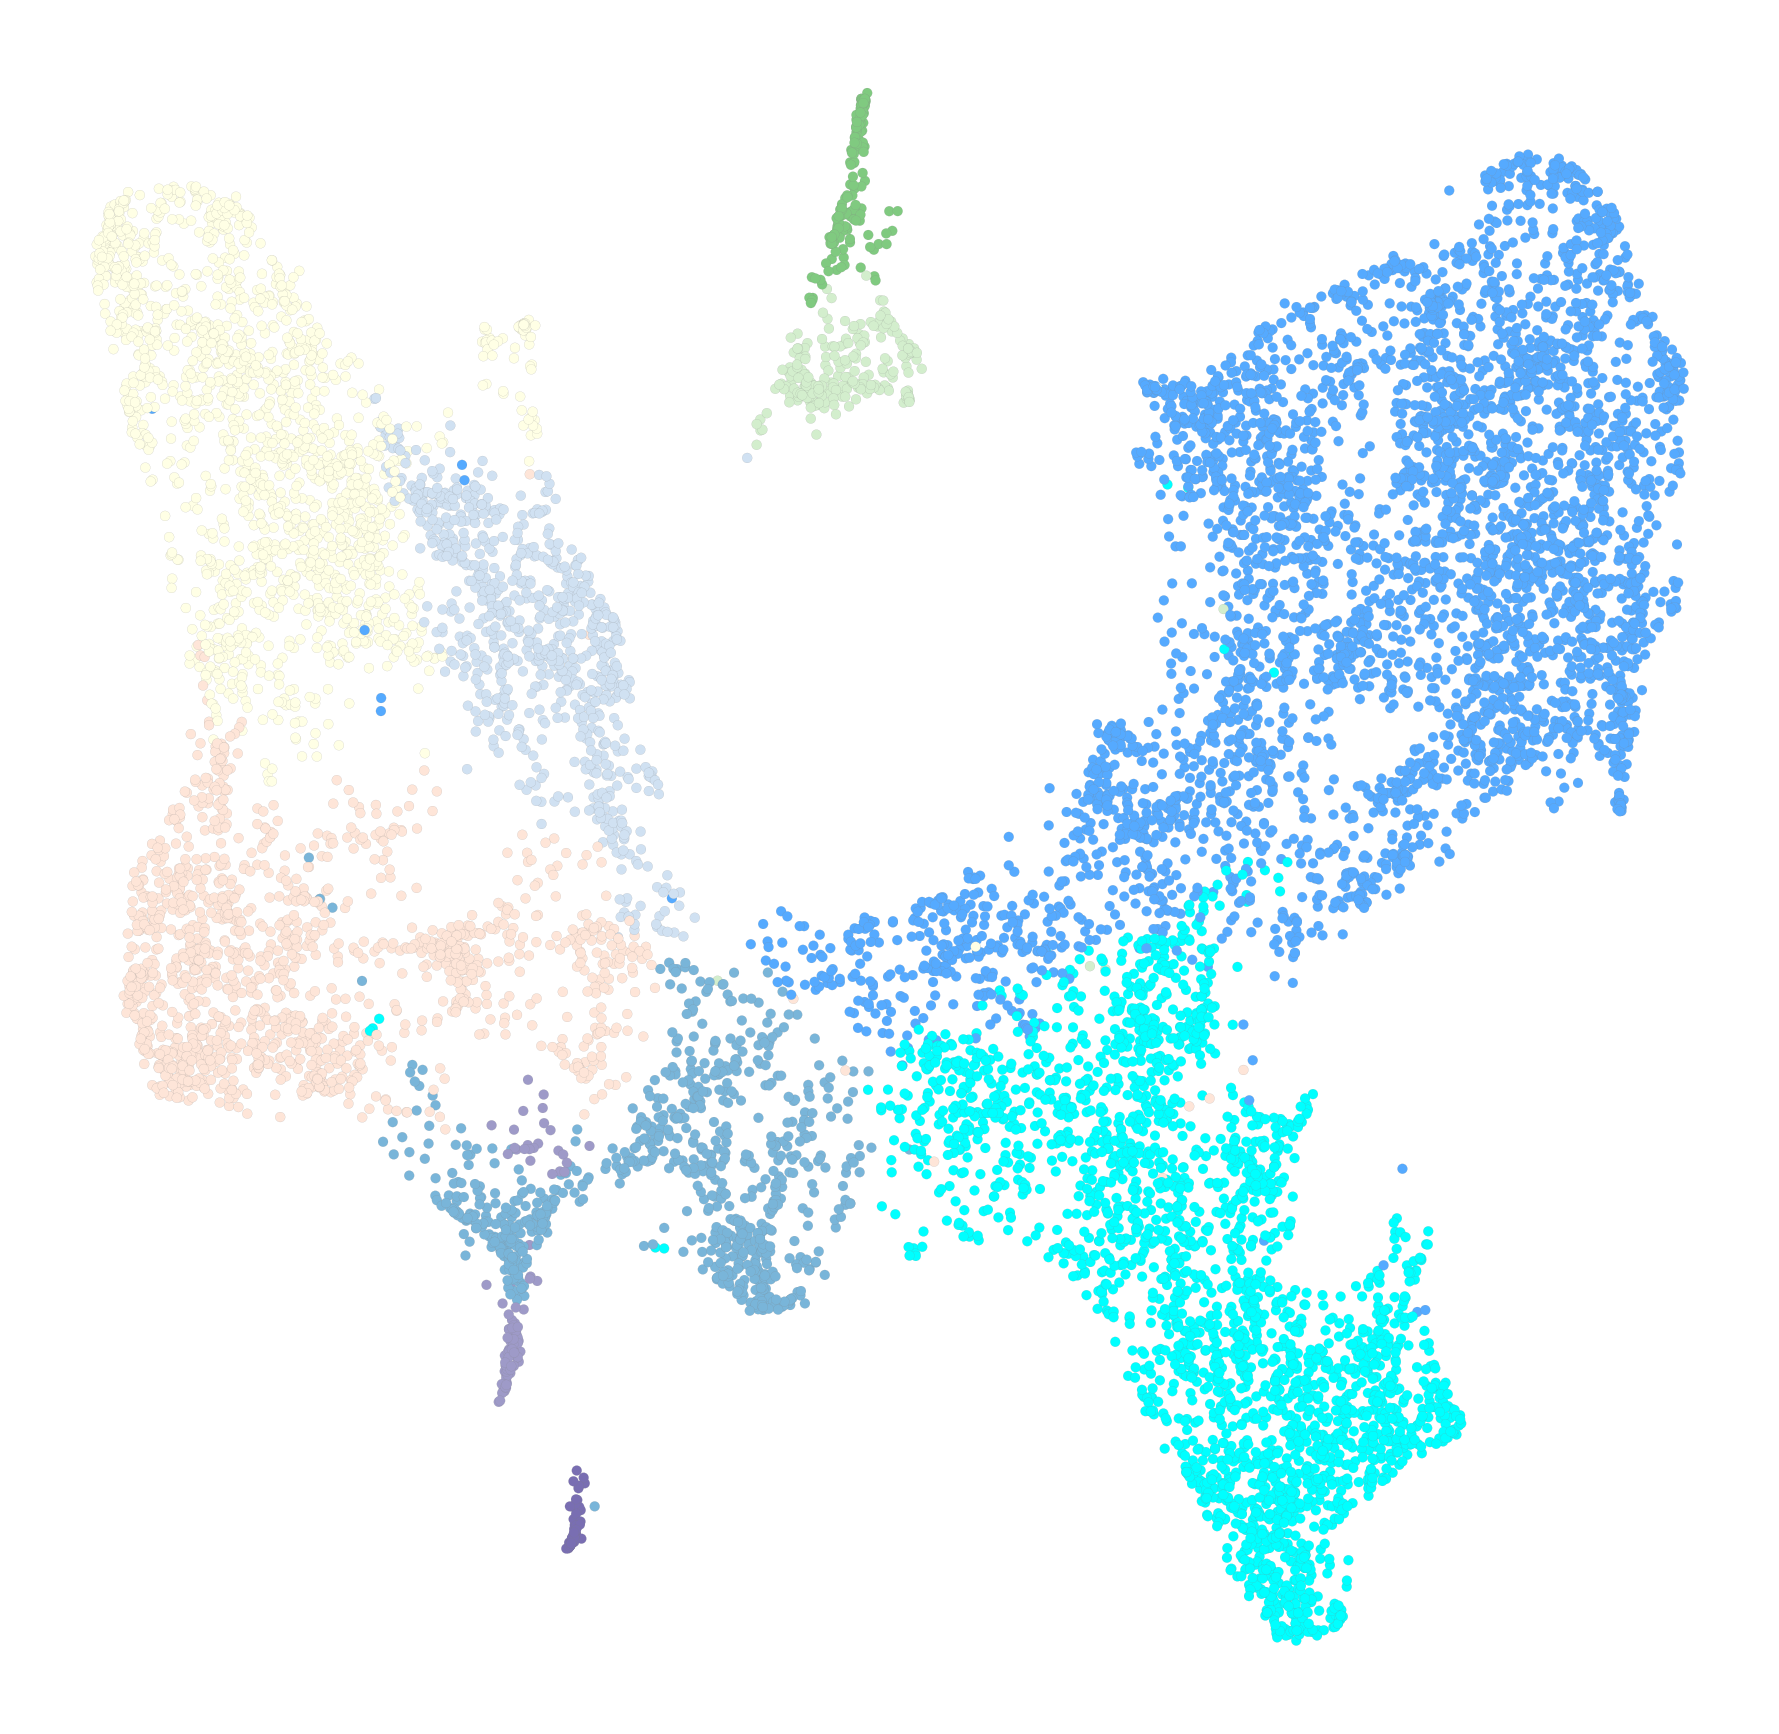

In [37]:
custom_colors = {"F1: Superficial": np.array([1.        , 1.        , 0.89803922, 1.        ]),
 'F1: Regenerative': np.array([0.99607843, 0.80915033, 0.39607843, 1.        ]),
 'F2: Universal': np.array([0.81411765, 0.88392157, 0.94980392, 1.        ]),
 "F2/3: Perivascular": np.array([0.47294118, 0.71163399, 0.85071895, 1.        ]),
 'F3: FRC-like': np.array([0.99692426, 0.89619377, 0.84890427, 1.        ]),
 'F4: DS_DPEP1+': np.array([0.82745098, 0.93254902, 0.80313725, 1.        ]),
 'F4: TNN+COCH+': np.array([0.50196078, 0.79058824, 0.50143791, 1.        ]),
 'F4: DP_HHIP+': np.array([0.15294118, 0.56183007, 0.28313725, 1.        ]),
 'F5: RAMP1+':np.array([0.6177624 , 0.60213764, 0.78345252, 1.        ]),
 'F5: NGFR+': np.array([0.47320261, 0.43267974, 0.69934641, 1.        ]),
 'F6: Inflammatory myofibroblast': np.array([0., 1., 1., 1.]),
 'F7: Myofibroblast': np.array([0.33333333, 0.66666667, 1.        , 1.        ]),
       'F8: Fascia-like myofibroblast': np.array([0.95686275, 0.55686275, 0.74509804, 1.0]),
 'F_Fascia': np.array([0, 0, 0, 0.3])
                               }


try:
    adata_i.uns["annotation_colors"] = [custom_colors[cat] for cat in adata_i.obs["annotation"].cat.categories]
except KeyError as e:
    print(f"Error: Missing color for category {e}")


sc.pl.umap(
    adata_i,
    color='annotation',
    show=True,
    frameon=False,
    legend_loc=None,
    legend_fontsize=15,
    s=80,
    title='',
    legend_fontoutline=2,
    save="7d_mainpart_wounds_umap.pdf",
    edgecolor='grey', 
    linewidth=.05
)


/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


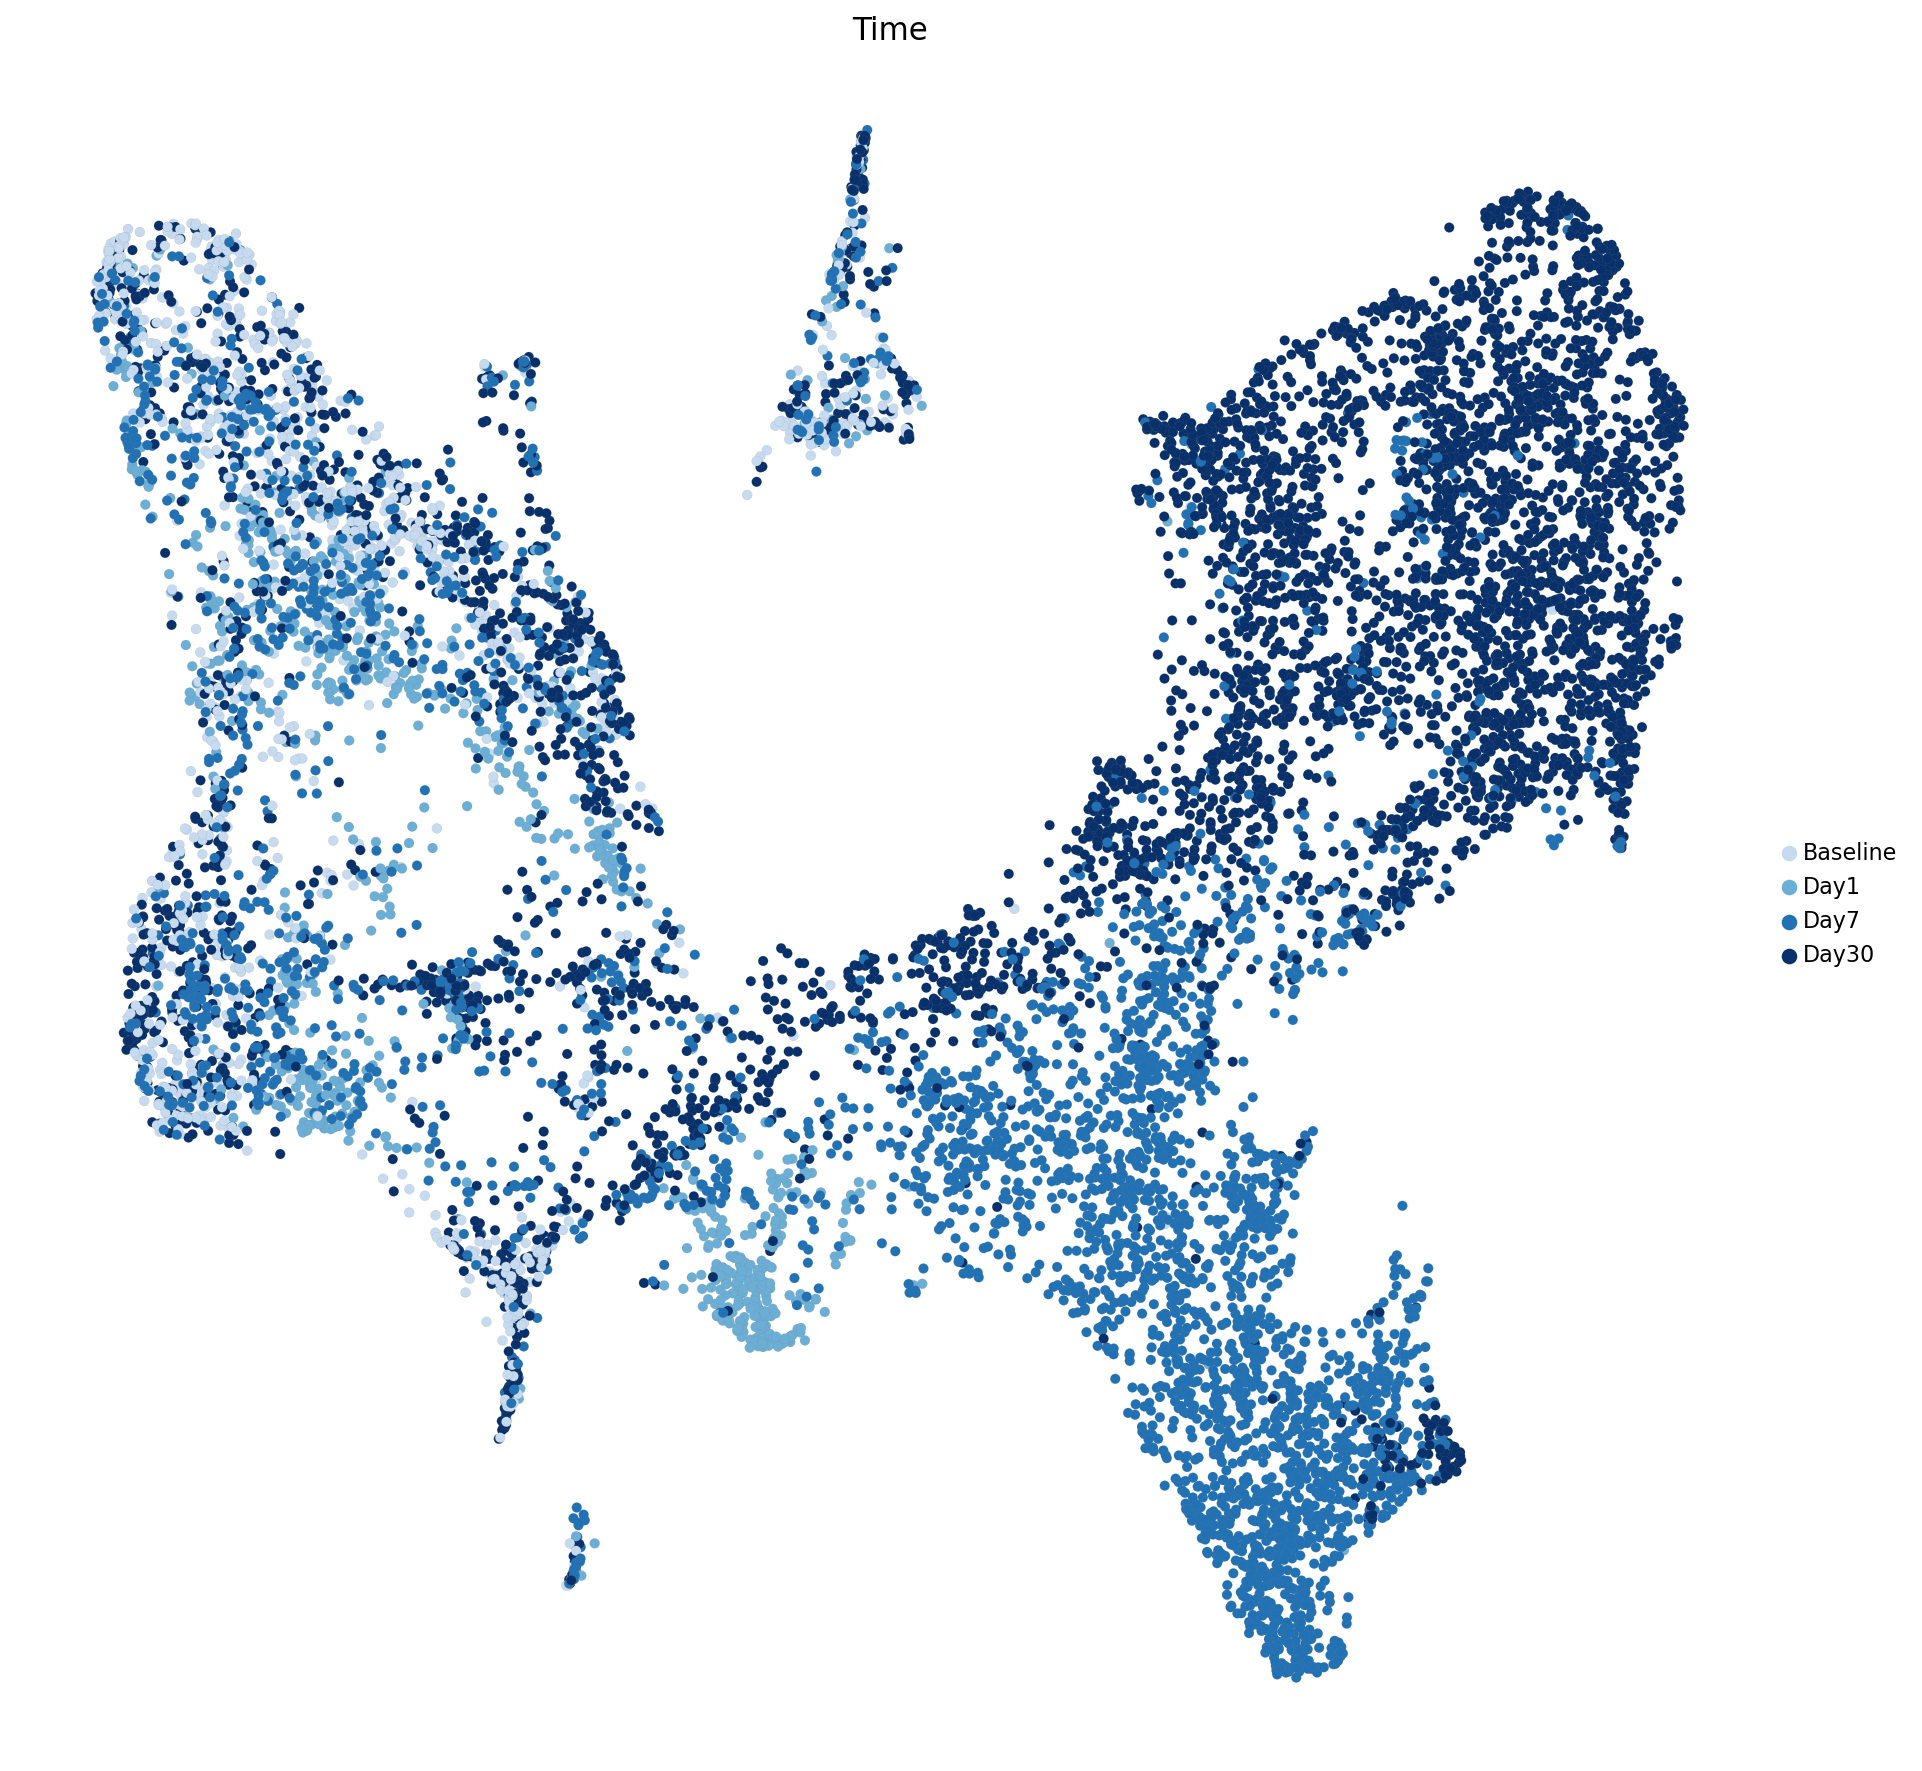

In [38]:
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(14, 14))

custom_palette = {
    "Baseline": "#c6dbef" , 
    "Day1":   "#6baed6",   
    "Day7":  "#2171b5",     
    "Day30":  "#08306b"    
}


sc.pl.umap(
    adata_i,
    color="Time",
    s=80,
    palette=custom_palette,   
    legend_fontoutline=2,
    legend_fontsize=10,
        save="7d_wounds_umap_time.pdf",
        edgecolor='grey', 
    linewidth=.05
)

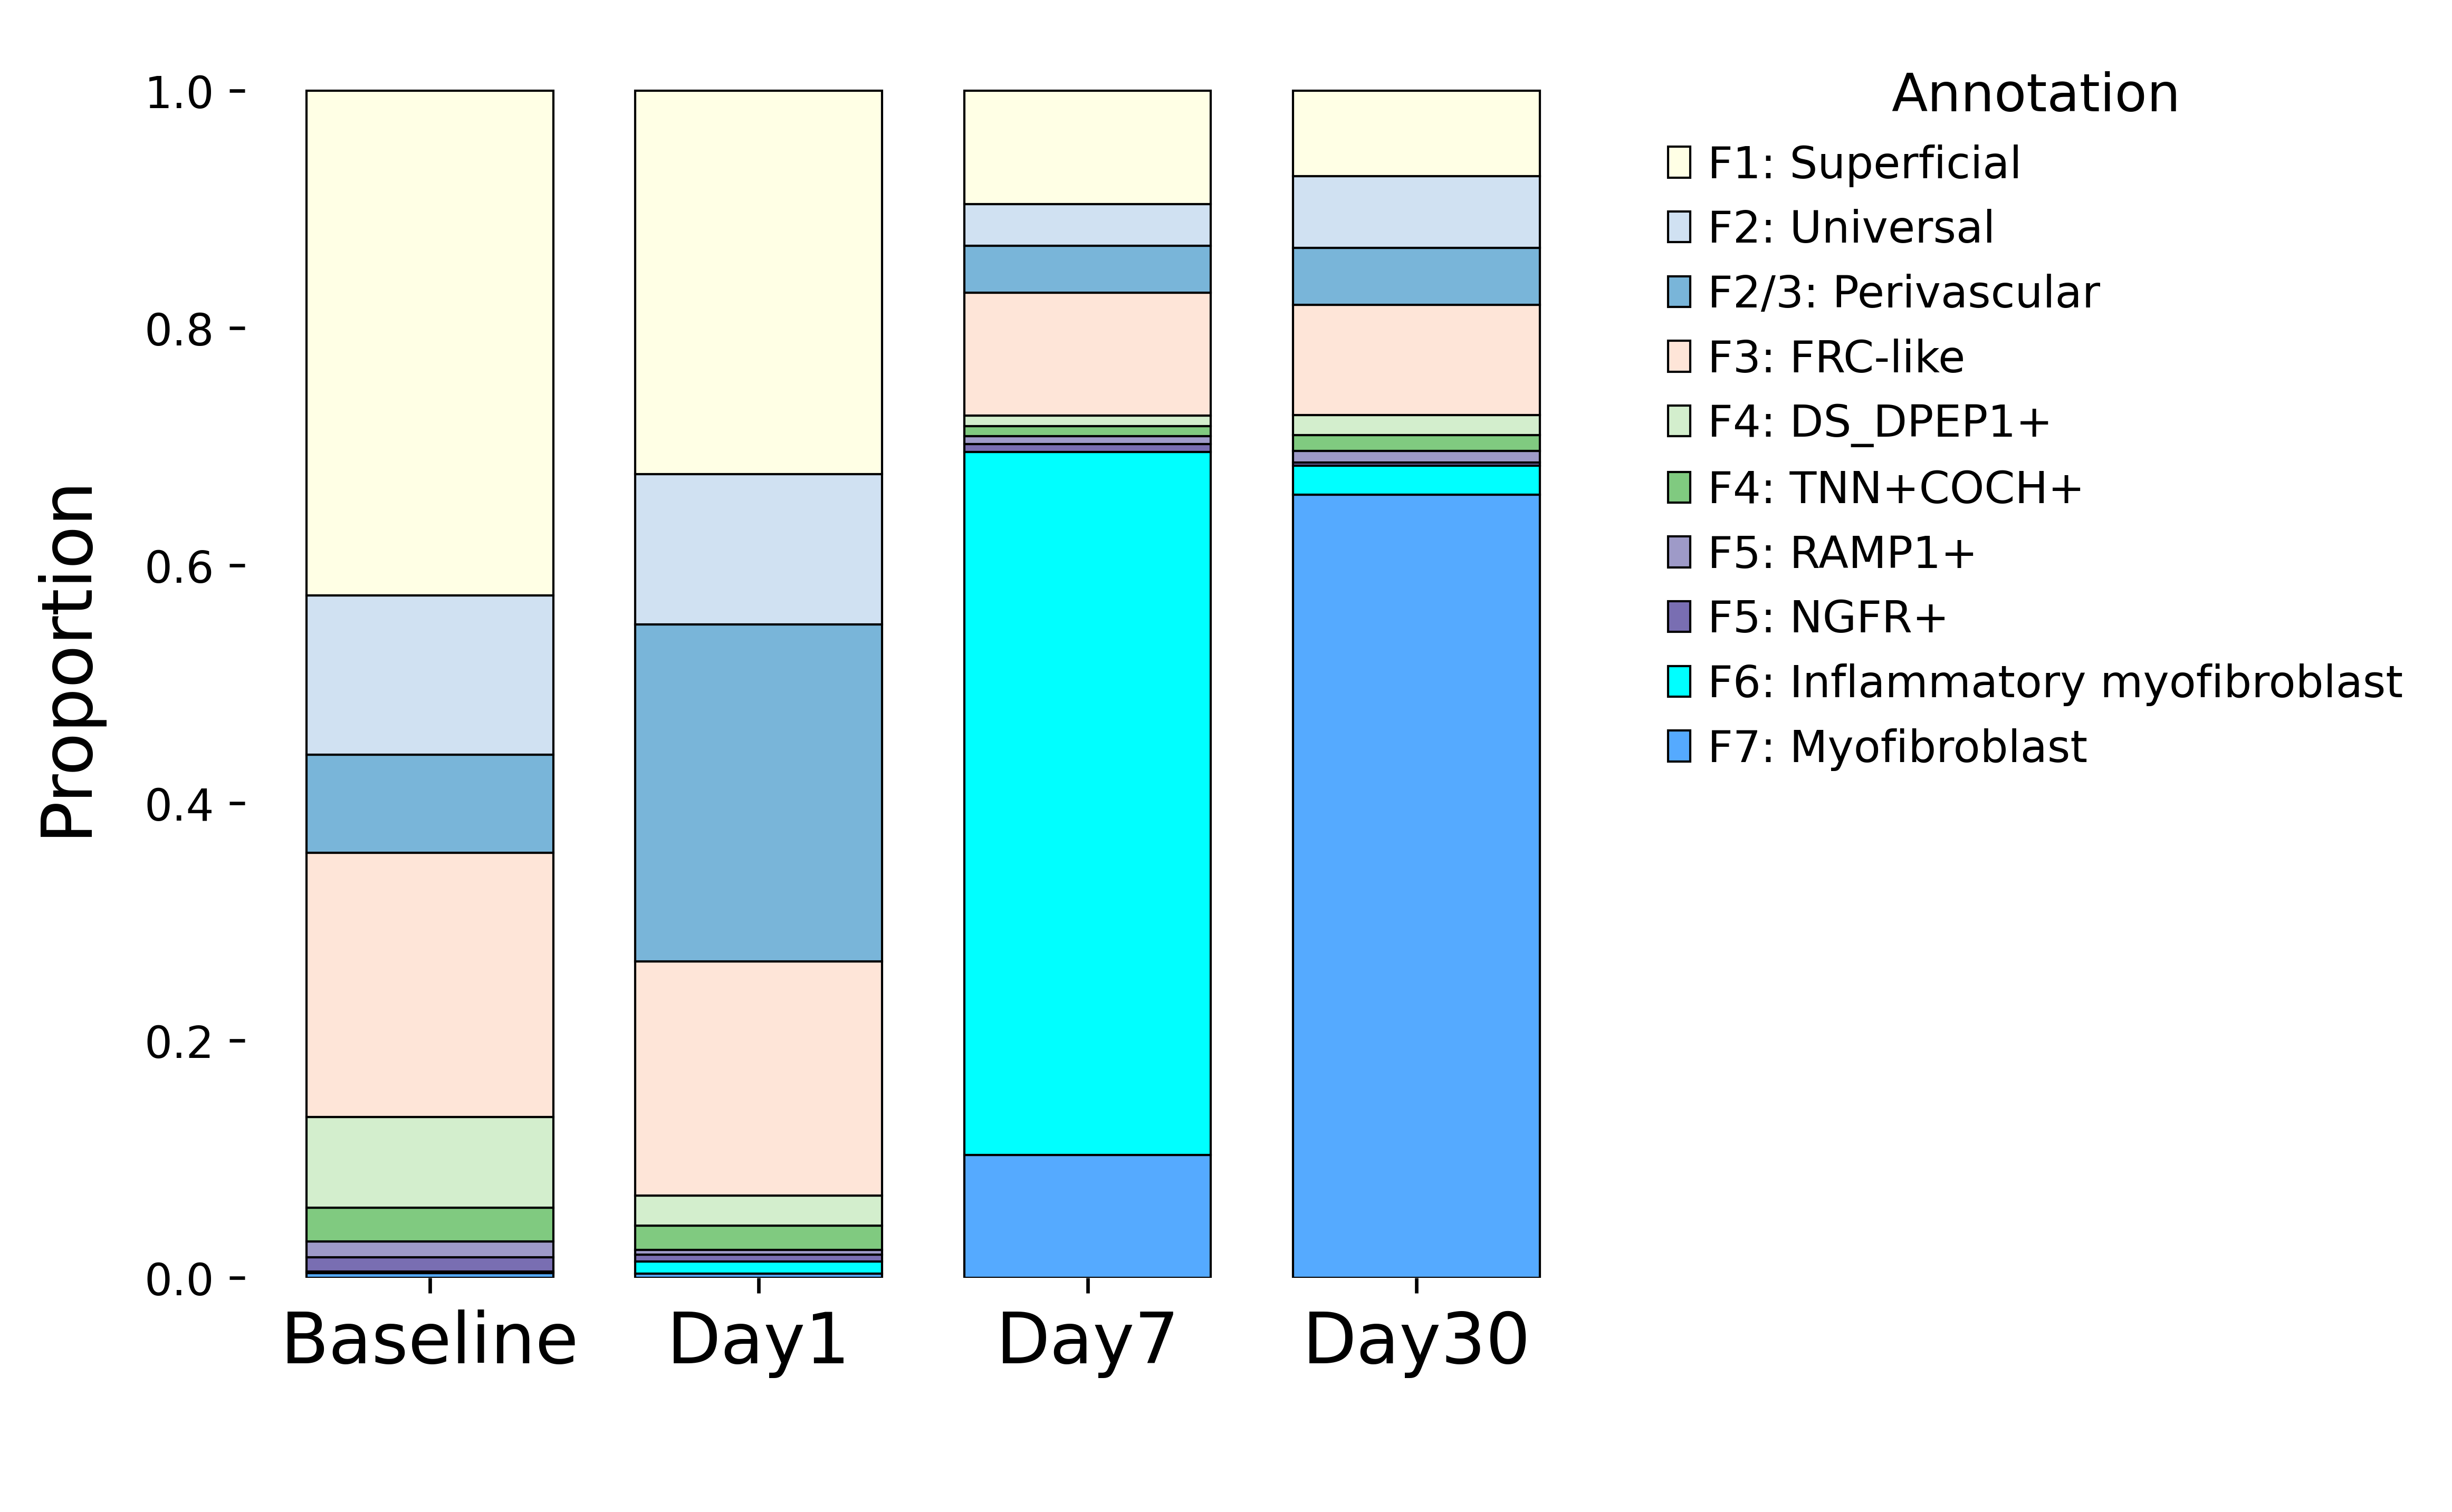

In [39]:
grouped = adata_i.obs.groupby(['Time', 'annotation'], observed=True).size().unstack(fill_value=0)
proportions = grouped.div(grouped.sum(axis=1), axis=0)
annotation_counts = adata_i.obs["annotation"].value_counts()
sorted_annotations = annotation_counts.index
proportions = proportions[sorted_annotations.intersection(proportions.columns)]

ORDER = [
    'F1: Superficial', 'F2: Universal', 'F2/3: Perivascular', 'F3: FRC-like',
    'F4: DS_DPEP1+', 'F4: TNN+COCH+', 'F5: RAMP1+', 'F5: NGFR+', 
    'F6: Inflammatory myofibroblast', 'F7: Myofibroblast'
]
existing_order = [ann for ann in ORDER if ann in proportions.columns]
proportions = proportions[existing_order]


color_list = [custom_colors.get(ann, np.array([0.8, 0.8, 0.8, 1.0])) for ann in proportions.columns]
fig, ax = plt.subplots(figsize=(8, 5), dpi=300, )

bar_width = 0.75  
indices = np.arange(len(proportions))

bottom = np.zeros(len(proportions))
for i, annotation in enumerate(reversed(proportions.columns)):  
    heights = np.nan_to_num(proportions[annotation])

    ax.bar(
        indices,
        heights,
        bar_width,
        bottom=bottom,
        color=color_list[-(i + 1)],  # Use custom RGBA color
        label=annotation,
        edgecolor="black" if np.any(heights > 0) else None,
        linewidth=0.5
    )
    bottom += heights

ax.set_xticks(indices)
ax.set_xticklabels(proportions.index, rotation=0, fontsize=16)

ax.set_xlabel(' ', fontsize=14, labelpad=10)
ax.set_ylabel('Proportion', fontsize=16, labelpad=10)
plt.yticks(fontsize=10)
plt.ylim(0, 1.05)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.grid(False)

handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.02, 1), loc='upper left', 
                   frameon=False, fontsize=10, title="Annotation", title_fontsize=12)
plt.setp(legend.get_texts(), fontsize='10')

plt.tight_layout()
plt.savefig("fig5/time_barplot_wound.pdf", dpi=300, bbox_inches="tight", format="pdf")  
plt.show()
 

/tmp/ipykernel_32253/3209830095.py:57: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


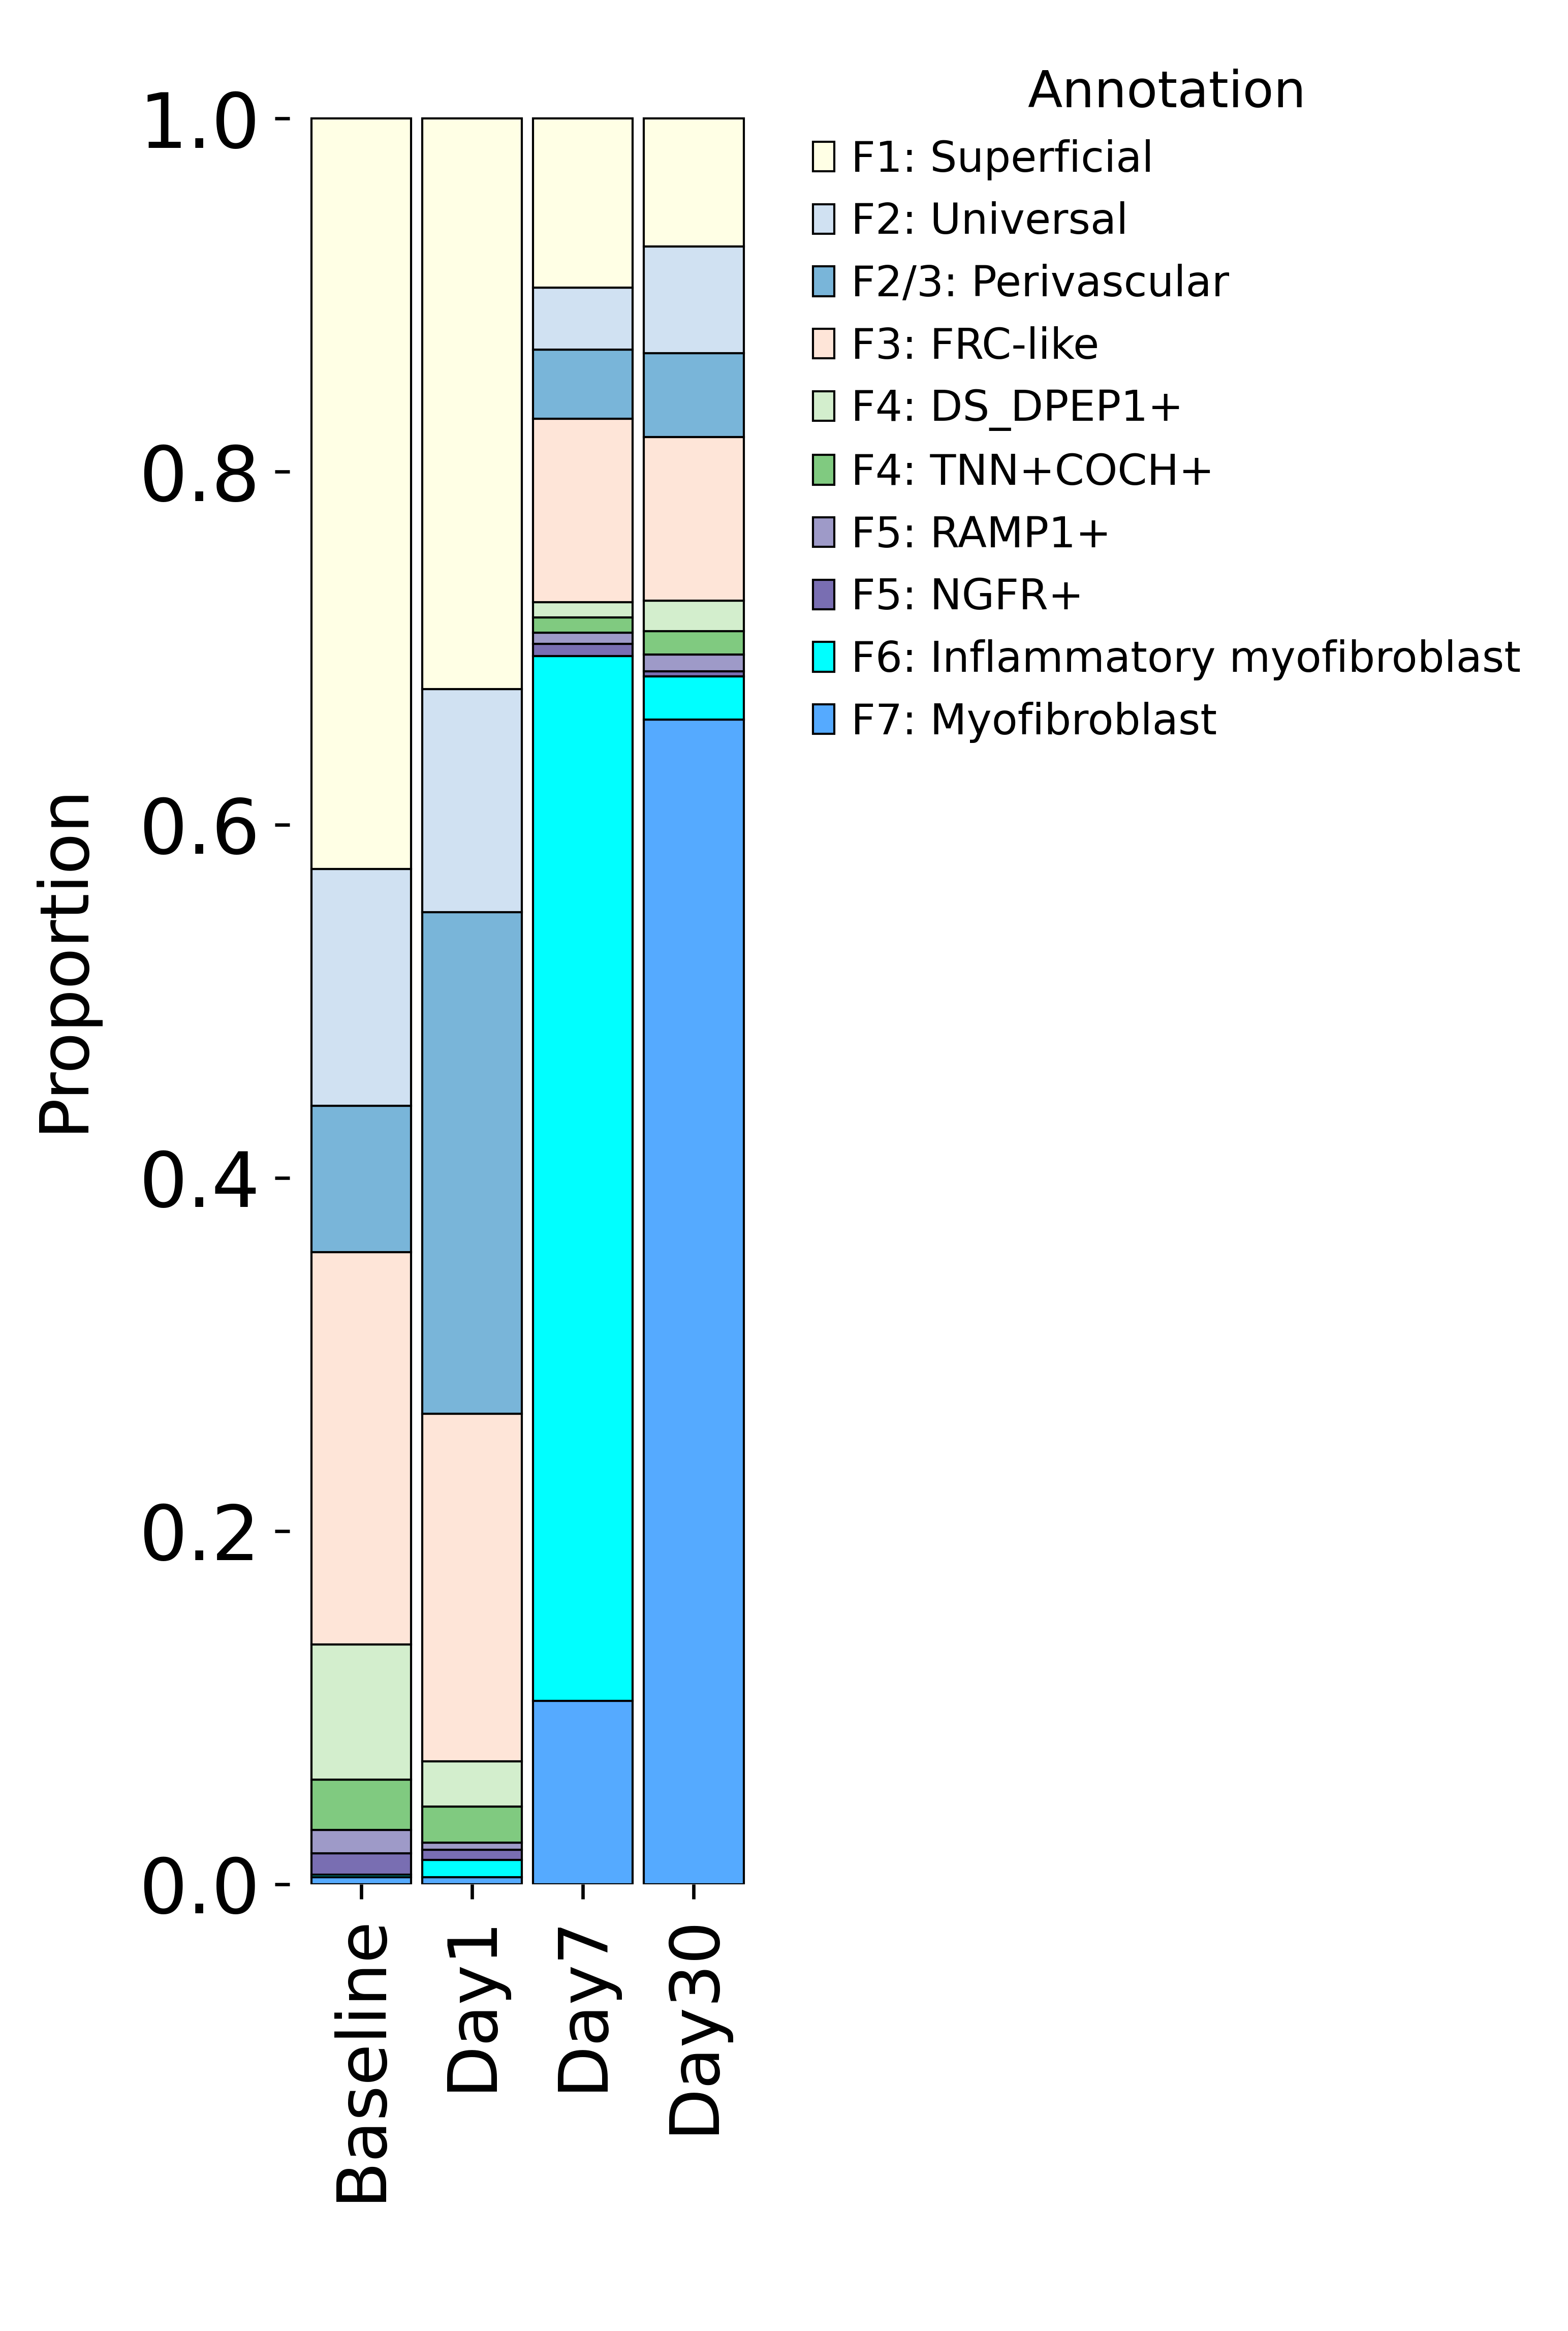

In [40]:
grouped = adata_i.obs.groupby(['Time', 'annotation'], observed=True).size().unstack(fill_value=0)
proportions = grouped.div(grouped.sum(axis=1), axis=0)
annotation_counts = adata_i.obs["annotation"].value_counts()
sorted_annotations = annotation_counts.index
proportions = proportions[sorted_annotations.intersection(proportions.columns)]

ORDER = [
    'F1: Superficial', 'F2: Universal', 'F2/3: Perivascular', 'F3: FRC-like',
    'F4: DS_DPEP1+', 'F4: TNN+COCH+', 'F5: RAMP1+', 'F5: NGFR+', 
    'F6: Inflammatory myofibroblast', 'F7: Myofibroblast'
]
existing_order = [ann for ann in ORDER if ann in proportions.columns]
proportions = proportions[existing_order]


color_list = [custom_colors.get(ann, np.array([0.8, 0.8, 0.8, 1.0])) for ann in proportions.columns]
fig, ax = plt.subplots(figsize=(2, 8), dpi=300, )

bar_width = .9
indices = np.arange(len(proportions))

bottom = np.zeros(len(proportions))
for i, annotation in enumerate(reversed(proportions.columns)):  
    heights = np.nan_to_num(proportions[annotation])

    ax.bar(
        indices,
        heights,
        bar_width,
        bottom=bottom,
        color=color_list[-(i + 1)],  # Use custom RGBA color
        label=annotation,
        edgecolor="black" if np.any(heights > 0) else None,
        linewidth=0.5
    )
    bottom += heights

ax.set_xticks(indices)
ax.set_xticklabels(proportions.index, rotation=90, fontsize=16)

ax.set_xlabel(' ', fontsize=14, labelpad=10)
ax.set_ylabel('Proportion', fontsize=16, labelpad=10)
plt.yticks(fontsize=18)
plt.ylim(0, 1.05)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.grid(False)

handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.02, 1), loc='upper left', 
                   frameon=False, fontsize=10, title="Annotation", title_fontsize=12)
plt.setp(legend.get_texts(), fontsize='10')

plt.tight_layout()
plt.savefig("fig5/time_barplot_wound_tallernbut thickerbars.pdf", dpi=300, bbox_inches="tight", format="pdf")  
plt.show()
 

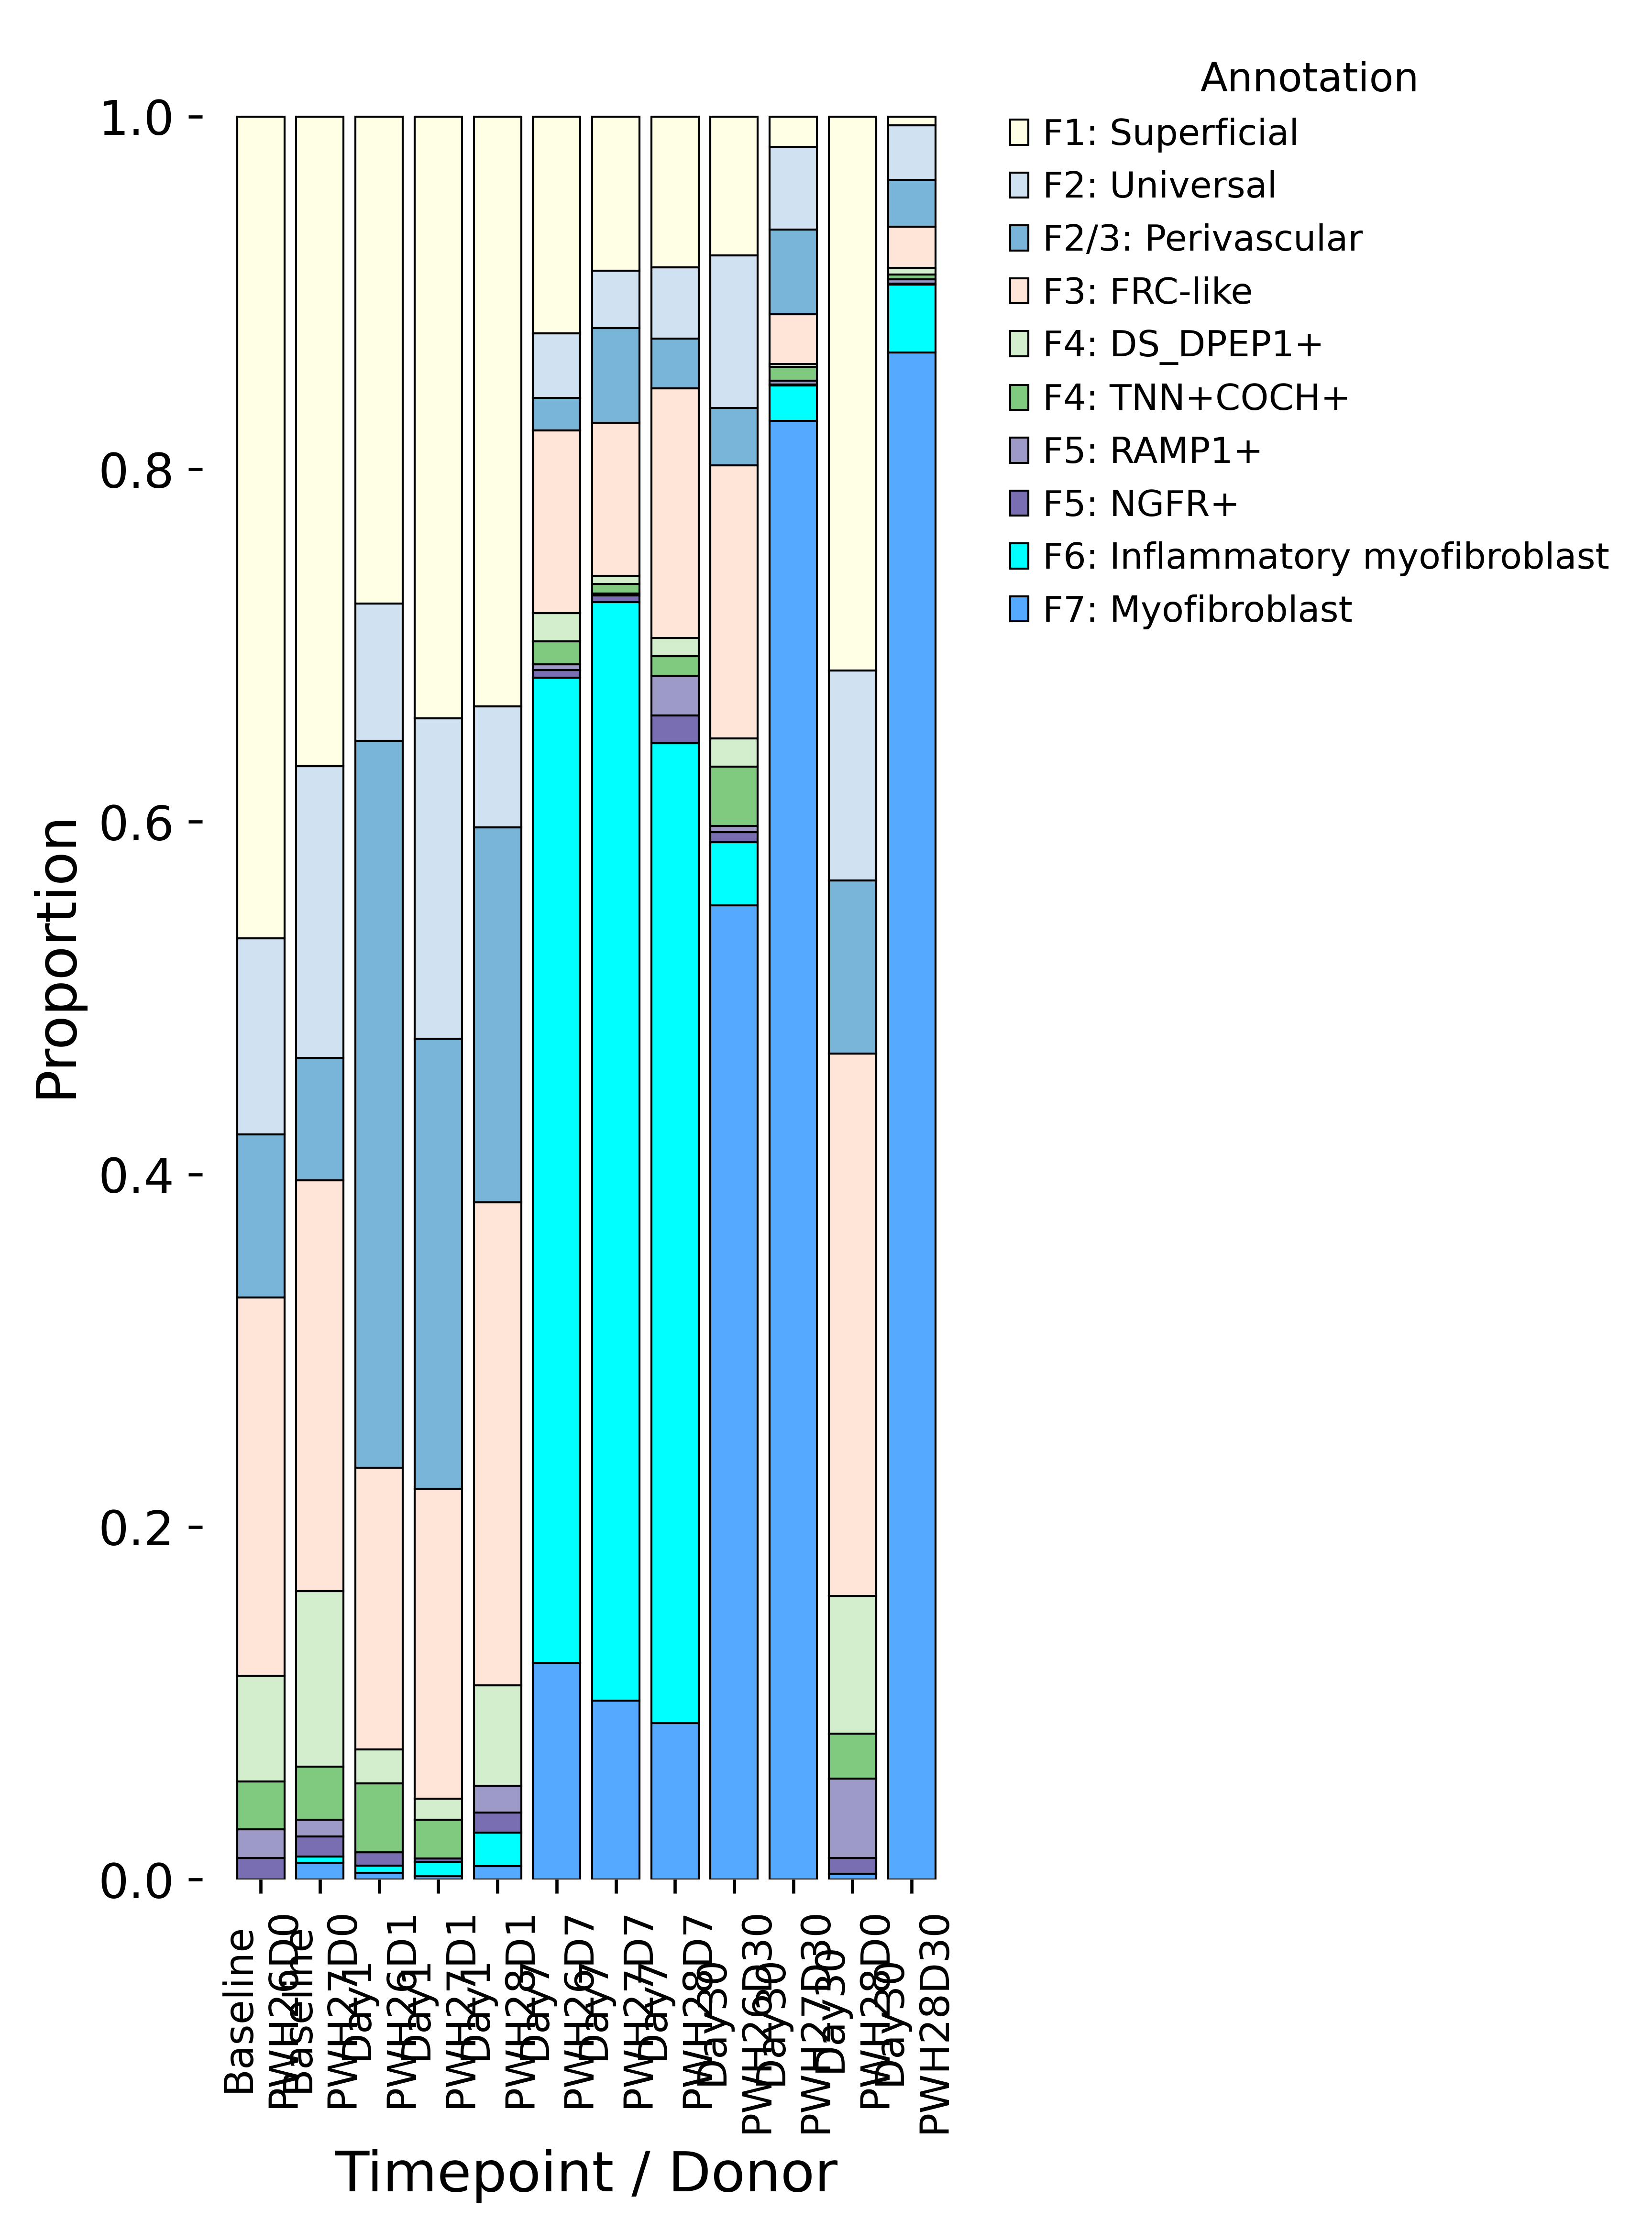

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Compute proportions per donor per timepoint
grouped = (
    adata_i.obs
    .groupby(['Time', 'sample_id', 'annotation'], observed=True)
    .size()
    .unstack(fill_value=0)
)

# Normalize within each (Time, sample_id) row
proportions = grouped.div(grouped.sum(axis=1), axis=0)

# Reorder columns by your annotation order
ORDER = [
    'F1: Superficial', 'F2: Universal', 'F2/3: Perivascular', 'F3: FRC-like',
    'F4: DS_DPEP1+', 'F4: TNN+COCH+', 'F5: RAMP1+', 'F5: NGFR+', 
    'F6: Inflammatory myofibroblast', 'F7: Myofibroblast'
]
existing_order = [ann for ann in ORDER if ann in proportions.columns]
proportions = proportions[existing_order]

# Flatten the multiindex for plotting
proportions.index = proportions.index.set_names(['Time', 'Sample'])
proportions = proportions.reset_index()

# Sort for nice grouping
proportions = proportions.sort_values(by=["Time", "Sample"])

# Prepare bar positions
num_bars = len(proportions)
bar_width = 0.8
indices = np.arange(num_bars)

# Build bottom stacker
bottom = np.zeros(num_bars)

# Color list for annotations
color_list = [custom_colors.get(ann, np.array([0.8, 0.8, 0.8, 1.0])) for ann in proportions.columns[2:]]

# Start plotting
fig, ax = plt.subplots(figsize=(max(6, num_bars * 0.3), 8), dpi=300)

for i, annotation in enumerate(reversed(proportions.columns[2:])):
    heights = np.nan_to_num(proportions[annotation].values)

    ax.bar(
        indices,
        heights,
        bar_width,
        bottom=bottom,
        color=color_list[-(i + 1)],
        label=annotation,
        edgecolor="black" if np.any(heights > 0) else None,
        linewidth=0.5
    )
    bottom += heights

# Set X labels to Time + sample_id
xtick_labels = proportions.apply(lambda row: f"{row['Time']}\n{row['Sample']}", axis=1)
ax.set_xticks(indices)
ax.set_xticklabels(xtick_labels, rotation=90, fontsize=10)

# Labeling etc.
ax.set_ylabel('Proportion', fontsize=14)
plt.ylim(0, 1.05)
plt.yticks(fontsize=12)
ax.set_xlabel('Timepoint / Donor', fontsize=14)

# Remove spines and grid
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)

# Legend
handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(
    reversed(handles), reversed(labels),
    bbox_to_anchor=(1.01, 1),
    loc='upper left',
    frameon=False,
    fontsize=9,
    title="Annotation",
    title_fontsize=10
)
plt.setp(legend.get_texts(), fontsize='9')

plt.tight_layout()
#plt.savefig("fig5/time_sample_grouped_barplot_bydonor.pdf", dpi=300, bbox_inches="tight")
plt.show()

In [49]:
sample_to_time = dict(adata_i.obs[["sample_id", "Time"]].drop_duplicates().values)
sample_to_time

{'PWH26D30': 'Day30',
 'PWH28D1': 'Day1',
 'PWH27D0': 'Baseline',
 'PWH27D1': 'Day1',
 'PWH28D7': 'Day7',
 'PWH28D0': 'Day30',
 'PWH26D1': 'Day1',
 'PWH26D0': 'Baseline',
 'PWH26D7': 'Day7',
 'PWH27D30': 'Day30',
 'PWH27D7': 'Day7',
 'PWH28D30': 'Day30'}

In [50]:
RENAME = {'PWH26D30': 'Day30',
 'PWH28D1': 'Day1',
 'PWH27D0': 'Baseline',
 'PWH27D1': 'Day1',
 'PWH28D7': 'Day7',
 'PWH28D0': 'Baseline',
 'PWH26D1': 'Day1',
 'PWH26D0': 'Baseline',
 'PWH26D7': 'Day7',
 'PWH27D30': 'Day30',
 'PWH27D7': 'Day7',
 'PWH28D30': 'Day30'}
adata_i.obs["Time"] = adata_i.obs["sample_id"].map(RENAME)

/tmp/ipykernel_32253/1747517172.py:50: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  proportions_spaced = pd.concat(spaced, ignore_index=True)
/tmp/ipykernel_32253/1747517172.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), rotation=90, fontsize=12)


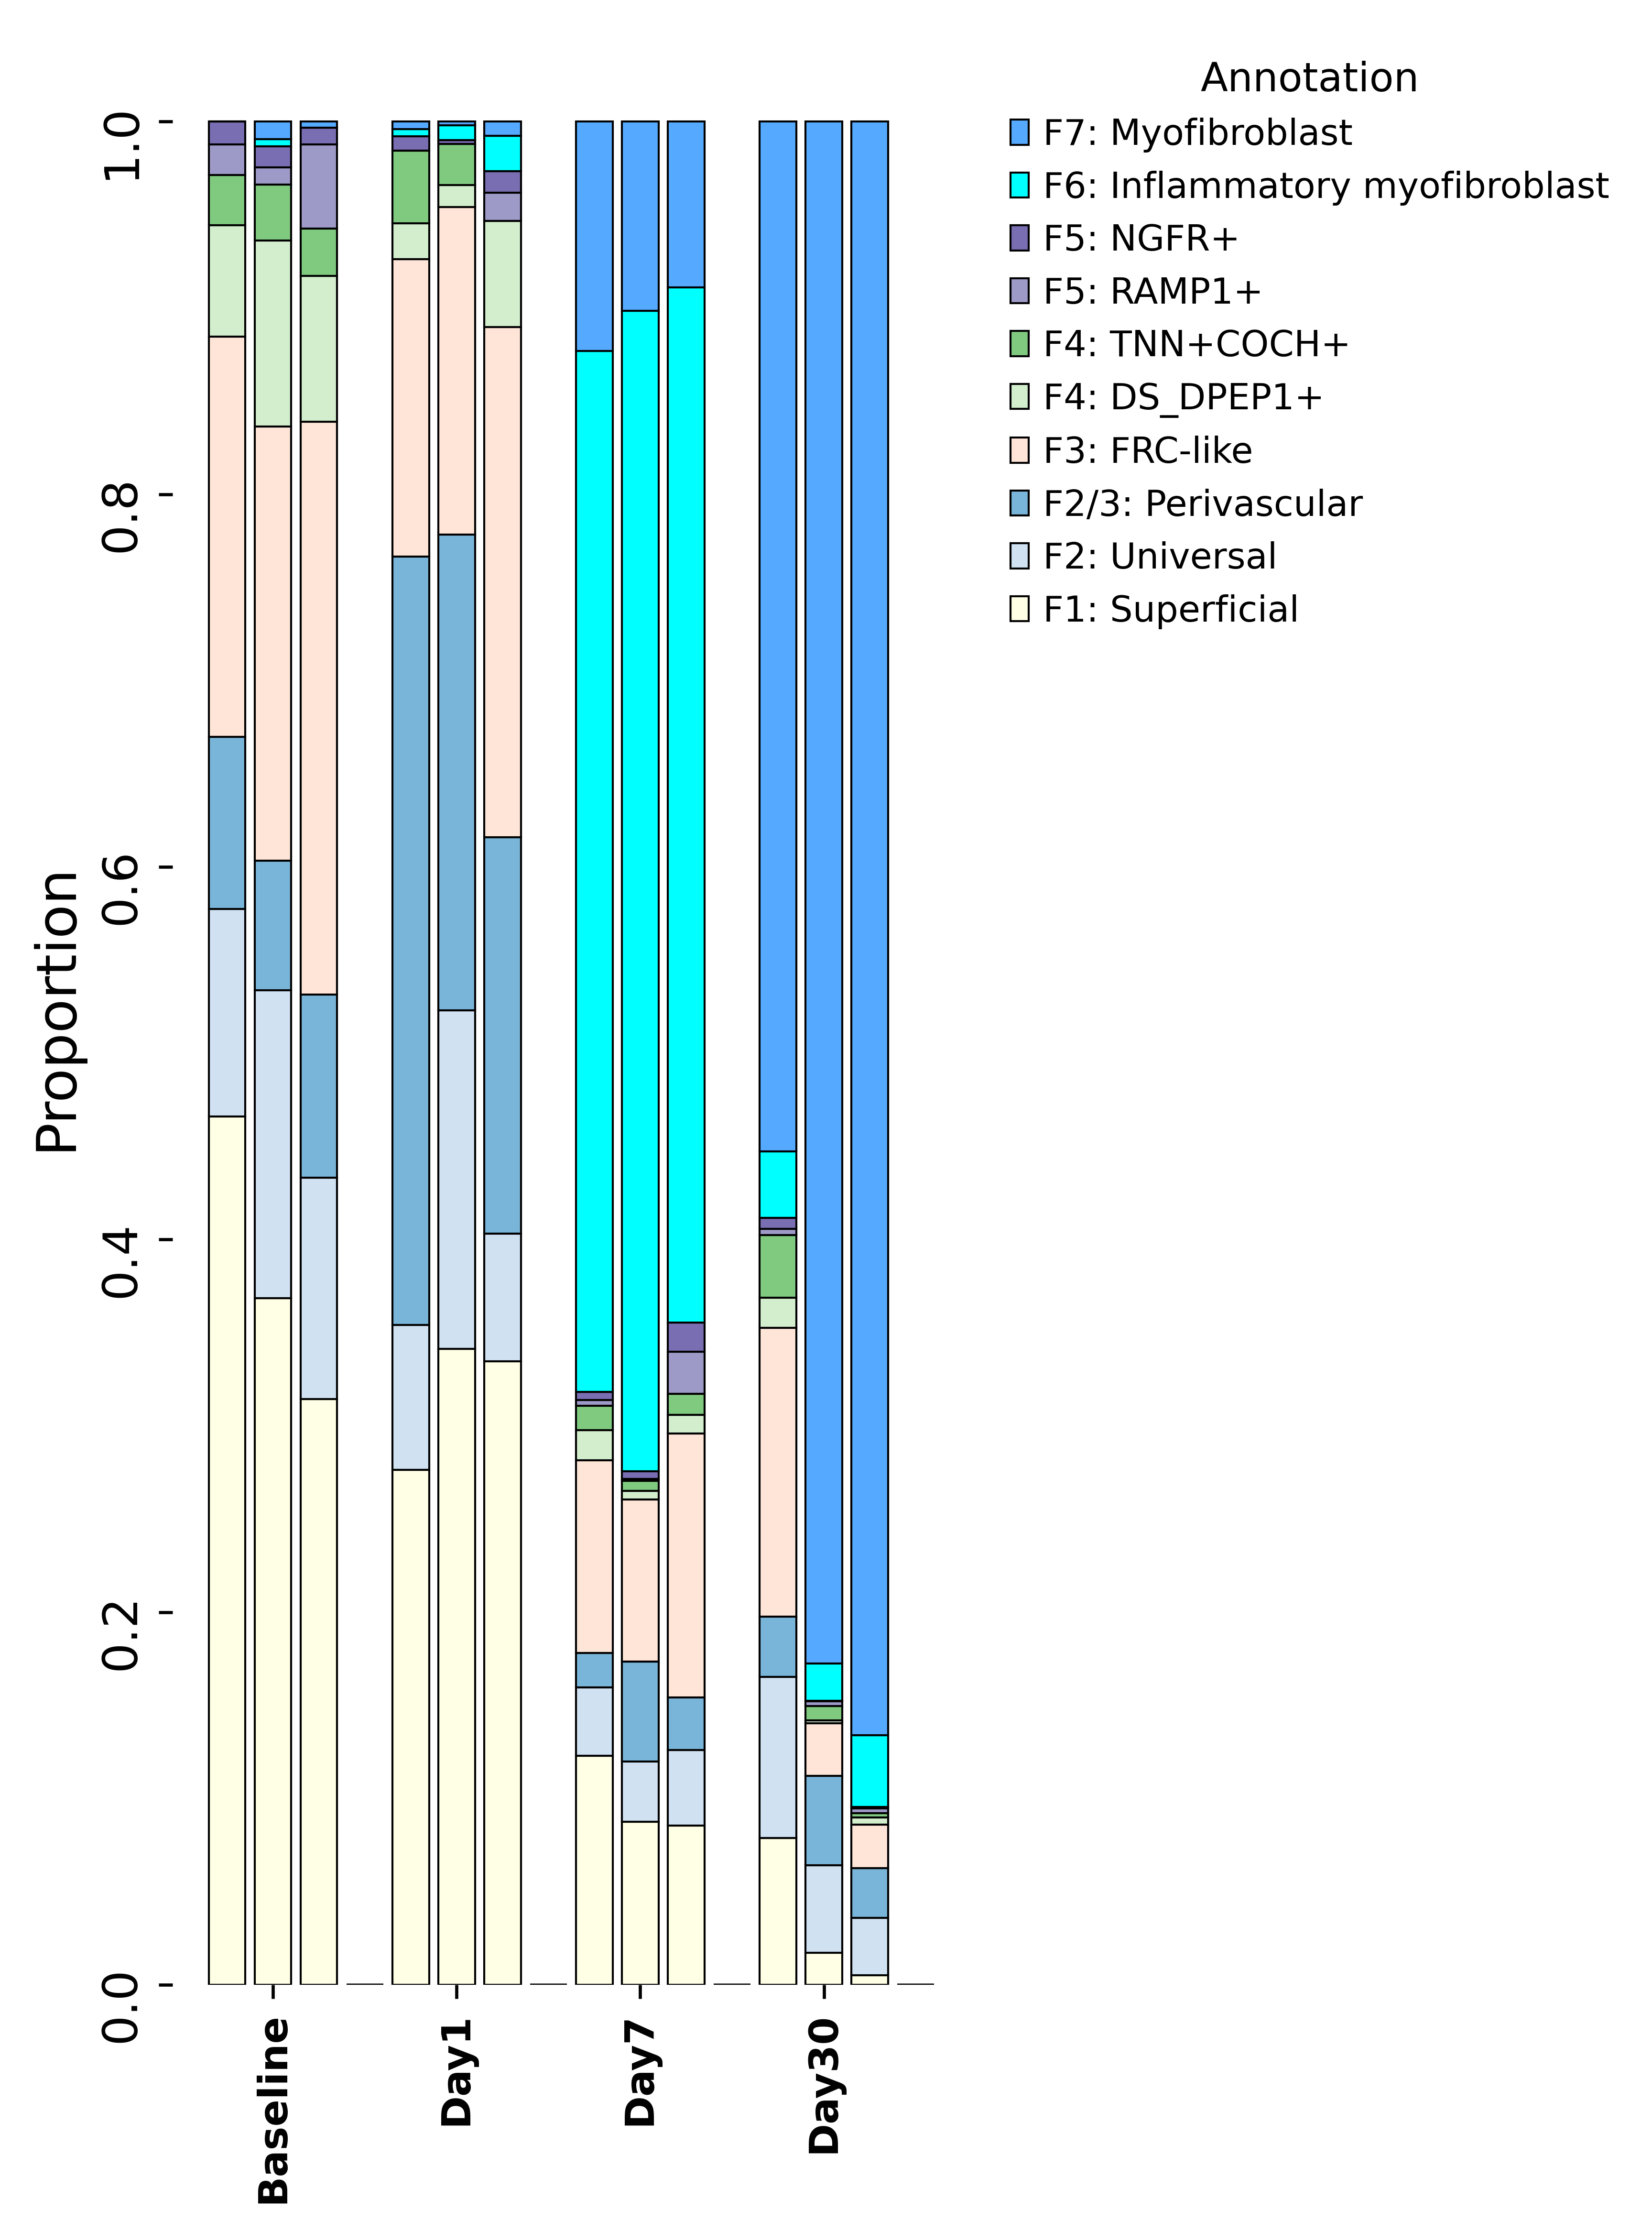

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Group and normalize
grouped = (
    adata_i.obs
    .groupby(['Time', 'sample_id', 'annotation'], observed=True)
    .size()
    .unstack(fill_value=0)
)
proportions = grouped.div(grouped.sum(axis=1), axis=0)

# 2. Reorder columns

ORDER = [
    'F1: Superficial', 'F2: Universal', 'F2/3: Perivascular', 'F3: FRC-like',
    'F4: DS_DPEP1+', 'F4: TNN+COCH+', 'F5: RAMP1+', 'F5: NGFR+', 
    'F6: Inflammatory myofibroblast', 'F7: Myofibroblast'
]
ORDER=ORDER[::-1]
existing_order = [ann for ann in ORDER if ann in proportions.columns]
proportions = proportions[existing_order]


# 3. Reset index for manipulation
proportions.index = proportions.index.set_names(['Time', 'Sample'])
proportions = proportions.reset_index()
proportions = proportions.sort_values(by=["Time", "Sample"])
timepoint_order = ["Baseline", "Day1", "Day7", "Day30",]  # or whatever order you want
proportions["Time"] = pd.Categorical(proportions["Time"], categories=timepoint_order, ordered=True)
proportions = proportions.sort_values(by=["Time", "Sample"])

# 4. Add spacers
spaced = []
spacer_width = 1

for t in proportions["Time"].unique():
    group = proportions[proportions["Time"] == t]
    spaced.append(group)

    # Insert empty row
    spacer = pd.DataFrame(
        [[np.nan]*len(proportions.columns)],
        columns=proportions.columns
    )
    spacer["Time"] = t  # just for grouping consistency
    spaced.append(spacer)

proportions_spaced = pd.concat(spaced, ignore_index=True)

# 5. Plotting
num_bars = len(proportions_spaced)
indices = np.arange(num_bars)
bar_width = 0.8

fig, ax = plt.subplots(figsize=(max(6, num_bars * 0.25), 8), dpi=300)
bottom = np.zeros(num_bars)




annotation_cols = proportions.columns[2:]  # skip Time and Sample
color_list = [custom_colors.get(ann, np.array([0.8, 0.8, 0.8, 1.0])) for ann in annotation_cols]

for i, annotation in enumerate(reversed(annotation_cols)):
    heights = np.nan_to_num(proportions_spaced[annotation].values)
    ax.bar(
        indices,
        heights,
        bar_width,
        bottom=bottom,
        color=color_list[-(i + 1)],
        edgecolor="black" if np.any(heights > 0) else None,
        linewidth=0.5,
        label=annotation
    )
    bottom += heights



# 6. Set x-ticks (only show labels on center of each Time block)
tick_positions = []
tick_labels = []
running = 0

for t in proportions["Time"].unique():
    group_len = len(proportions[proportions["Time"] == t])
    center = running + (group_len - 1) / 2
    tick_positions.append(center)
    tick_labels.append(t)
    running += group_len + 1  # +1 for spacer

ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, fontsize=10, fontweight='bold', rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=90, fontsize=12)

# 7. Final touches
ax.set_xlabel('', fontsize=1)
ax.set_ylabel('Proportion', fontsize=14)
plt.yticks(fontsize=12)
plt.ylim(0, 1.05)

handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(
    reversed(handles), reversed(labels),
    bbox_to_anchor=(1.01, 1),
    loc='upper left',
    frameon=False,
    fontsize=9,
    title="Annotation",
    title_fontsize=10
)
plt.setp(legend.get_texts(), fontsize='9')

for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)

plt.tight_layout()
plt.savefig("fig5/time_grouped_by_donor_bars_spaced.pdf", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
grouped = adata_i.obs.groupby(['Time', 'annotation'], observed=True).size().unstack(fill_value=0)
proportions = grouped.div(grouped.sum(axis=1), axis=0)
annotation_counts = adata_i.obs["annotation"].value_counts()
sorted_annotations = annotation_counts.index
proportions = proportions[sorted_annotations.intersection(proportions.columns)]

ORDER = [
    'F1: Superficial', 'F2: Universal', 'F2/3: Perivascular', 'F3: FRC-like',
    'F4: DS_DPEP1+', 'F4: TNN+COCH+', 'F5: RAMP1+', 'F5: NGFR+', 
    'F6: Inflammatory myofibroblast', 'F7: Myofibroblast'
]
existing_order = [ann for ann in ORDER if ann in proportions.columns]
proportions = proportions[existing_order]


color_list = [custom_colors.get(ann, np.array([0.8, 0.8, 0.8, 1.0])) for ann in proportions.columns]
fig, ax = plt.subplots(figsize=(2, 8), dpi=300, )

bar_width = 0.5
indices = np.arange(len(proportions))

bottom = np.zeros(len(proportions))
for i, annotation in enumerate(reversed(proportions.columns)):  
    heights = np.nan_to_num(proportions[annotation])

    ax.bar(
        indices,
        heights,
        bar_width,
        bottom=bottom,
        color=color_list[-(i + 1)],  # Use custom RGBA color
        label=annotation,
        edgecolor="black" if np.any(heights > 0) else None,
        linewidth=0.5
    )
    bottom += heights

ax.set_xticks(indices)
ax.set_xticklabels(proportions.index, rotation=90, fontsize=14)

ax.set_xlabel(' ', fontsize=14, labelpad=10)
ax.set_ylabel('Proportion', fontsize=16, labelpad=10)
plt.yticks(fontsize=10)
plt.ylim(0, 1.05)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.grid(False)

handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.02, 1), loc='upper left', 
                   frameon=False, fontsize=10, title="Annotation", title_fontsize=12)
plt.setp(legend.get_texts(), fontsize='10')

plt.tight_layout()
plt.savefig("fig5/time_barplot_wound_taller.pdf", dpi=300, bbox_inches="tight", format="pdf")  
plt.show()
 

In [ ]:
grouped = adata_i.obs.groupby(['Time', 'annotation'], observed=True).size().unstack(fill_value=0)
proportions = grouped.div(grouped.sum(axis=1), axis=0)
annotation_counts = adata_i.obs["annotation"].value_counts()
sorted_annotations = annotation_counts.index
proportions = proportions[sorted_annotations.intersection(proportions.columns)]

ORDER = [
    'F1: Superficial', 'F2: Universal', 'F2/3: Perivascular', 'F3: FRC-like',
    'F4: DS_DPEP1+', 'F4: TNN+COCH+', 'F5: RAMP1+', 'F5: NGFR+', 
    'F6: Inflammatory myofibroblast', 'F7: Myofibroblast'
]
existing_order = [ann for ann in ORDER if ann in proportions.columns]
proportions = proportions[existing_order]


color_list = [custom_colors.get(ann, np.array([0.8, 0.8, 0.8, 1.0])) for ann in proportions.columns]
fig, ax = plt.subplots(figsize=(2, 4), dpi=300, )

bar_width = 0.5
indices = np.arange(len(proportions))

bottom = np.zeros(len(proportions))
for i, annotation in enumerate(reversed(proportions.columns)):  
    heights = np.nan_to_num(proportions[annotation])

    ax.bar(
        indices,
        heights,
        bar_width,
        bottom=bottom,
        color=color_list[-(i + 1)],  # Use custom RGBA color
        label=annotation,
        edgecolor="black" if np.any(heights > 0) else None,
        linewidth=0.5
    )
    bottom += heights

ax.set_xticks(indices)
ax.set_xticklabels(proportions.index, rotation=90, fontsize=14)

ax.set_xlabel(' ', fontsize=14, labelpad=10)
ax.set_ylabel('Proportion', fontsize=16, labelpad=10)
plt.yticks(fontsize=10)
plt.ylim(0, 1.05)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.grid(False)

handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.02, 1), loc='upper left', 
                   frameon=False, fontsize=10, title="Annotation", title_fontsize=12)
plt.setp(legend.get_texts(), fontsize='10')

plt.tight_layout()
plt.savefig("fig5/time_barplot_wound_thinbutlesstall_taller.pdf", dpi=300, bbox_inches="tight", format="pdf")  
plt.show()
 

In [ ]:
grouped = adata_i.obs.groupby(['Time', 'annotation'], observed=True).size().unstack(fill_value=0)
proportions = grouped.div(grouped.sum(axis=1), axis=0)
annotation_counts = adata_i.obs["annotation"].value_counts()
sorted_annotations = annotation_counts.index
proportions = proportions[sorted_annotations.intersection(proportions.columns)]

ORDER = [
    'F1: Superficial', 'F2: Universal', 'F2/3: Perivascular', 'F3: FRC-like',
    'F4: DS_DPEP1+', 'F4: TNN+COCH+', 'F5: RAMP1+', 'F5: NGFR+', 
    'F6: Inflammatory myofibroblast', 'F7: Myofibroblast'
]
existing_order = [ann for ann in ORDER if ann in proportions.columns]
proportions = proportions[existing_order]


color_list = [custom_colors.get(ann, np.array([0.8, 0.8, 0.8, 1.0])) for ann in proportions.columns]
fig, ax = plt.subplots(figsize=(6, 8), dpi=300, )

bar_width = 0.75  
indices = np.arange(len(proportions))

bottom = np.zeros(len(proportions))
for i, annotation in enumerate(reversed(proportions.columns)):  
    heights = np.nan_to_num(proportions[annotation])

    ax.bar(
        indices,
        heights,
        bar_width,
        bottom=bottom,
        color=color_list[-(i + 1)],  # Use custom RGBA color
        label=annotation,
        edgecolor="black" if np.any(heights > 0) else None,
        linewidth=0.5
    )
    bottom += heights

ax.set_xticks(indices)
ax.set_xticklabels(proportions.index, rotation=0, fontsize=16)

ax.set_xlabel(' ', fontsize=14, labelpad=10)
ax.set_ylabel('Proportion', fontsize=16, labelpad=10)
plt.yticks(fontsize=10)
plt.ylim(0, 1.05)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.grid(False)

handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(
    reversed(handles), reversed(labels),
    bbox_to_anchor=(0.5, -0.2),  # Move legend below the plot
    loc="upper center",  # Center it horizontally
    frameon=False, fontsize=10,
    title="", title_fontsize=12,
    ncol=2  # Adjust number of columns for compact layout
)

plt.setp(legend.get_texts(), fontsize='10')


plt.tight_layout()
plt.savefig("fig5/time_barplot_wound_legendbelow.pdf", dpi=300, bbox_inches="tight", format="pdf")  
plt.show()
 

In [ ]:
# ALL_GENES={'F1': ['APCDD1',
#   'COL18A1',
#   'COL23A1',
#   'COL13A1',
#   'NKD2',
#   'RSPO1',
#   'AXIN2',
#   'WIF1',
#   #'SFRP2'
#                  ],
#  'F2: Universal': ['CD34',
#   'PI16',
#   'DPP4',
#   'MFAP5',
#   'PCOLCE2',
#   #'CTHRC1',
#   'SLPI',
#   'CD70',
#   'LGR5'],
#  'F2/3: Bridge': ['CXCL12',
#   'APOE',
#   'EFEMP1',
#   'APOC1',
#   'C7',
#   'PLA2G2A',
#   'PPARG',
#   'MYOC',
#   'GDF10'],
#  'F3': ['CCL19',
#   'CD74',
#   'CH25H',
#   'TNFSF13B',
#   'IL33',
#   'IRF8',
#   'IL15',
#   'VCAM1',
#   'HLA-DRA',
#   'HLA-DRB1'],
#  'F4: DS_DPEP1+': [ 'MEF2C', 'DPEP1', 'MYL4'],
#  'F4: TNN+COCH+': ['TNN',
#   'COCH',
#   'CRABP1',
#   'COL24A1',
#   'RSPO4',
#   'SLITRK6',
#   'NRG3',
#   'MKX',
#   'TNMD'],
#  'F5': ['SCN7A', 'FMO2', 'FGFBP2', 'OLFML2A'],
#  'F5+: RAMP1': ['RAMP1', 'RELN', 'PLEKHA6', 'IGFBP2', 'SFRP1'],
#  'F5: NGFR+': ['EBF2', 'NGFR', 'ITGA6', 'CDH19', 'CLDN1'],
#           'F1+F6:My_Inf': ['WNT5A', 'COL7A1'],
#             'F6 (both)': ['WNT2', 'COL10A1', 'LAMP5'],
#  'F6: Myofibroblast inflammatory': ['CXCL8',
#   'CXCL5',
#   'CXCL6',
#   'CXCL13',
#   'IL11',
#   'IL24',
#   'MMP1',
#   'MMP3',
#   'IL7R',
#   'INHBA',
#   'CSF3',
#   'TDO2',
#   'WWC1',
#   'CHI3L1',
#   'STAT4',
#   'CCL5',
#   'CCL3',
#   'CCL11', "FAM167A"],

#  'F6: MyoFb': ['NRG1', 'OGN', 'ACTA2',
#   'TAGLN',
#   'KIF26B',
#   'ZNF469',
#   'RUNX2',
#   'SULF1',
#   'ADAM12',
#   'COL8A1',
#   'LRRC15',
#   'CREB3L1',

#  # 'WISP1',
#   'FABP5',
#   'CDH2', 'C1QTNF3', 'CADM1', 'LRRC17', 'PIEZO2', 'KCNMA1'],
#                        'F1/2/4/5 MARKERS  + F6': ['ASPN',   'COMP', 'COL11A1', 'SFRP4',  'CTHRC1', ],

#  #           'F7': ['ACAN'],
# # 'F_Fascia': ['SCX', 'THBS4', 'ITGA10', 'EVI2A', 'FGF18', 'PRG4', 'CRTAC1']
          
          
#           }

# sc.pl.dotplot(
#     adata_i,
#     ALL_GENES,
#     groupby=f'annotation',
#     #vmax=1.1,
#     colorbar_title='Mean expression\n(variance scaled)', 
#    standard_scale="var",
#     dendrogram=False,
#     save="dotplot_wounds.pdf"
# )

In [ ]:
cell_death_markers = {
    "Apoptosis": [
        "BAX", "BAK1", "BCL2", "BCL2L1", "BID", "BCL2L11", "BAD", "PMAIP1",
        "BBC3", "CASP3", "CASP7", "CASP8", "CASP9", "CASP10", "FAS", "FASLG",
        "TNFRSF10A", "TNFRSF10B", "TNFRSF1A", "TNF", "CYCS", "DIABLO",
        "XIAP", "AIFM1", "ENDOG", "GZMB", "GZMA", "TP53", "CDKN1A", "RB1"
    ],
    "Necroptosis": [
        "MLKL", "RIPK1", "RIPK3", "FADD", "TRADD", "TNF", "TNFRSF1A", "CASP8"
    ],
    "Pyroptosis": [
        "CASP1", "CASP4", "CASP5", "NLRP3", "GSDMD", "IL1B", "IL18", "PYCARD",
        "HMGB1"
    ],
    "Ferroptosis": [
        "GPX4", "ACSL4", "SLC7A11", "FTH1", "TFRC", "NCOA4", "SAT1", "ALOX15",
        "GCLC", "GCLM", "SLC3A2", "KEAP1", "NFE2L2"
    ],
    "Autophagy": [
        "MAP1LC3B", "BECN1", "ATG5", "ATG7", "ATG12", "ATG16L1", "SQSTM1",
        "MAP1LC3A", "GABARAP", "GABARAPL1", "DRAM1", "BNIP3", "BNIP3L"
    ],
    "Anoikis": [
        "BCL2L11", "BAD", "BAX", "BAK1", "CASP3", "CASP7", "CASP8", "FAS",
        "TNFSF10", "ITGA5", "ITGB1", "FN1", "LAMC2"
    ],
    "Parthanatos": [
        "PARP1", "AIFM1", "CYP1A1", "PARG", "MIF", "HMGB1"
    ]
}
def remove_markers(LIST):
    try: 
        LIST = {key: [gene for gene in genes if gene in adata_i.var_names] 
                           for key, genes in LIST.items()}
    except: 
        LIST =[gene for gene in LIST if gene in adata_i.var_names]
    return LIST
sc.pl.dotplot(
    adata_i,
    remove_markers(cell_death_markers),
    groupby=f'Time',
    #vmax=1.1,
    colorbar_title='Mean expression\n(variance scaled)', 
   standard_scale="var",
    dendrogram=False,
)
sc.pl.dotplot(
    adata_i,
    remove_markers(cell_death_markers),
    groupby=f'annotation',
    #vmax=1.1,
    colorbar_title='Mean expression\n(variance scaled)', 
   standard_scale="var",
    dendrogram=False,
)

In [ ]:
RA_GENES=["IL6", 'CD200', 'CDH11', 'FGFR2', 'COL12A1', 'DKK3', 'CCL19']
sc.pl.dotplot(
    adata_i,
    RA_GENES,
    groupby=f'annotation',
    #vmax=1.1,
    colorbar_title='Mean expression\n(variance scaled)', 
   standard_scale="var",
    dendrogram=False,
)
sc.pl.dotplot(
    adata_i,
    RA_GENES,
    groupby=f'Time',
    #vmax=1.1,
    colorbar_title='Mean expression\n(variance scaled)', 
   standard_scale="var",
    dendrogram=False,
)


In [ ]:
adata_ii=adata_i[adata_i.obs["annotation"].str.startswith("F3")]
sc.pl.dotplot(
    adata_ii,
    RA_GENES,
    groupby=f'annotation',
    #vmax=1.1,
    colorbar_title='Mean expression\n(variance scaled)', 
   standard_scale="var",
    dendrogram=False,
)
sc.pl.dotplot(
    adata_ii,
    RA_GENES,
    groupby=f'Time',
    #vmax=1.1,
    colorbar_title='Mean expression\n(variance scaled)', 
   standard_scale="var",
    dendrogram=False,
)

In [ ]:
adata_ii=adata_i[adata_i.obs["annotation"].str.startswith("F6")]
sc.pl.dotplot(
    adata_ii,
    RA_GENES,
    groupby=f'annotation',
    #vmax=1.1,
    colorbar_title='Mean expression\n(variance scaled)', 
   standard_scale="var",
    dendrogram=False,
)
sc.pl.dotplot(
    adata_ii,
    RA_GENES,
    groupby=f'Time',
    #vmax=1.1,
    colorbar_title='Mean expression\n(variance scaled)', 
   standard_scale="var",
    dendrogram=False,
)

In [ ]:
sc.pl.dotplot(
    adata_ii,
    cell_death_markers,
    groupby=f'Time',
    #vmax=1.1,
    colorbar_title='Mean expression\n(variance scaled)', 
   standard_scale="var",
    dendrogram=False,
)

In [ ]:
adata_ii=adata_i[adata_i.obs["annotation"].str.startswith("F7")]
sc.pl.dotplot(
    adata_ii,
    RA_GENES,
    groupby=f'annotation',
    #vmax=1.1,
    colorbar_title='Mean expression\n(variance scaled)', 
   standard_scale="var",
    dendrogram=False,
)
sc.pl.dotplot(
    adata_ii,
    RA_GENES,
    groupby=f'Time',
    #vmax=1.1,
    colorbar_title='Mean expression\n(variance scaled)', 
   standard_scale="var",
    dendrogram=False,
)

In [ ]:
sc.pl.dotplot(
    adata_ii,
    cell_death_markers,
    groupby=f'Time',
    #vmax=1.1,
    colorbar_title='Mean expression\n(variance scaled)', 
   standard_scale="var",
    dendrogram=False,
)

In [ ]:
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(4, 4))

sc.pl.umap(
    adata_i,
    color=["MKI67" ],
    s=10,
    palette=custom_palette,   
#    legend_fontoutline=2,
    legend_fontsize=100,
      #  save="wounds_umap_time.pdf",
        edgecolor='grey', 
    cmap="Reds",
    linewidth=.05,
    vmax=2,
    title='',
    save="fig5_mki67_wound.pdf",
    
)

In [ ]:
sc.pl.umap(
    adata_i,
    color=["MKI67", "TOP2A" ],
    s=50,
    palette=custom_palette,   
    legend_fontoutline=2,
    legend_fontsize=10,
      #  save="wounds_umap_time.pdf",
        edgecolor='grey', 
    linewidth=.05,
    vmax=1
)

In [ ]:
adata_i.obs["annotation"].value_counts()

In [ ]:
adata_ii.obs["annotation"].value_counts()

In [ ]:
adata_ii=adata_i[adata_i.obs["annotation"].str.startswith("F6")]
PROLIF = ["MKI67", "TOP2A"]
sc.pl.dotplot(
    adata_ii,
    PROLIF,
    groupby=f'Time',
    #vmax=1.1,
    colorbar_title='Mean expression\n(log1p norm)', 
  # standard_scale="var",
    vmax=2,
    dendrogram=False,
    dot_max=1,
    save = "7d_prolif_f6.pdf"
)

# sc.pl.dotplot(
#     adata_ii,
#     PROLIF,
#     groupby=f'Time',
#     #vmax=1.1,
#     colorbar_title='Mean expression\n(variance scaled)', 
#    standard_scale="var",
#     dendrogram=False,
# )


In [ ]:
import scanpy as sc

# Compute the number of cells per time point
cell_counts = adata_ii.obs["Time"].value_counts().to_dict()

# Append the cell count to each time label
adata_ii.obs["Time_labelled"] = adata_ii.obs["Time"].map(lambda t: f"{t} (n={cell_counts[t]})")

# Make the dot plot with modified labels
sc.pl.dotplot(
    adata_ii,
    ["MKI67", "TOP2A"],  # Proliferation genes
    groupby="Time_labelled",  # Use new labels
    colorbar_title="Mean expression\n(log1p norm)", 
    vmax=2,
    dendrogram=False,
    dot_max=1,
    save="7d_prolif_f6.pdf"
)

In [ ]:
# adata_ii=adata_i[adata_i.obs["annotation"].str.startswith("F7")]
# sc.pl.dotplot(
#     adata_ii,
#     PROLIF,
#     groupby=f'annotation',
#     #vmax=1.1,
#     colorbar_title='Mean expression\n(variance scaled)', 
#    standard_scale="var",
#     dendrogram=False,
# )
# sc.pl.dotplot(
#     adata_ii,
#     PROLIF,
#     groupby=f'Time',
#     #vmax=1.1,
#     colorbar_title='Mean expression\n(variance scaled)', 
#    standard_scale="var",
#     dendrogram=False,
# )

In [ ]:
# sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(4, 4))

# sc.pl.umap(
#     adata_i,
#     color=["MKI67" , "Time"],
#     s=10,
#     palette=custom_palette,   
# #    legend_fontoutline=2,
#     legend_fontsize=10,
#       #  save="wounds_umap_time.pdf",
#         edgecolor='grey', 
#     cmap="Reds",
#     linewidth=.05,
#     vmax=2,
#     title='',
#     save="fig5d_mki67_wound.pdf",
    
# )

In [ ]:
# ALL_GENES={'F1': ['APCDD1',
#   'COL18A1',
#   'COL23A1',
#   'COL13A1',
#   'NKD2',
#   'RSPO1',
#   'AXIN2',
#   'WIF1',
#   #'SFRP2'
#                  ],
#  'F2: Universal': ['CD34',
#   'PI16',
#   'DPP4',
#   'MFAP5',
#   'PCOLCE2',
#   #'CTHRC1',
#   'SLPI',
#   'CD70',
#   'LGR5'],
#  'F2/3: Bridge': ['CXCL12',
#   'APOE',
#   'EFEMP1',
#   'APOC1',
#   'C7',
#   'PLA2G2A',
#   'PPARG',
#   'MYOC',
#   'GDF10'],
#  'F3': ['CCL19',
#   'CD74',
#   'CH25H',
#   'TNFSF13B',
#   'IL33',
#   'IRF8',
#   'IL15',
#   'VCAM1',
#   'HLA-DRA',
#   'HLA-DRB1'],
#  'F4: DS_DPEP1+': [ 'MEF2C', 'DPEP1', 'MYL4'],
#  'F4: TNN+COCH+': ['TNN',
#   'COCH',
#   'CRABP1',
#   'COL24A1',
#   'RSPO4',
#   'SLITRK6',
#   'NRG3',
#   'MKX',
#   'TNMD'],
#  'F5': ['SCN7A', 'FMO2', 'FGFBP2', 'OLFML2A'],
#  'F5+: RAMP1': ['RAMP1', 'RELN', 'PLEKHA6', 'IGFBP2', 'SFRP1'],
#  'F5: NGFR+': ['EBF2', 'NGFR', 'ITGA6', 'CDH19', 'CLDN1'],
#           'F1+F6:My_Inf': ['WNT5A', 'COL7A1'],
#             'F6 (both)': ['WNT2', 'COL10A1', 'LAMP5'],
#  'F6: Myofibroblast inflammatory': ['CXCL8',
#   'CXCL5',
#   'CXCL6',
#   'CXCL13',
#   'IL11',
#   'IL24',
#   'MMP1',
#   'MMP3',
#   'IL7R',
#   'INHBA',
#   'CSF3',
#   'TDO2',
#   'WWC1',
#   'CHI3L1',
#   'STAT4',
#   'CCL5',
#   'CCL3',
#   'CCL11', "FAM167A"],

#  'F6: MyoFb': ['NRG1', 'OGN', 'ACTA2',
#   'TAGLN',
#   'KIF26B',
#   'ZNF469',
#   'RUNX2',
#   'SULF1',
#   'ADAM12',
#   'COL8A1',
#   'LRRC15',
#   'CREB3L1',

#  # 'WISP1',
#   'FABP5',
#   'CDH2', 'C1QTNF3', 'CADM1', 'LRRC17', 'PIEZO2', 'KCNMA1'],
#                        'F1/2/4/5 MARKERS  + F6': ['ASPN',   'COMP', 'COL11A1', 'SFRP4',  'CTHRC1', ],

#  #           'F7': ['ACAN'],
# # 'F_Fascia': ['SCX', 'THBS4', 'ITGA10', 'EVI2A', 'FGF18', 'PRG4', 'CRTAC1']
#           "Other": ["MKI67", "TOP2A"]
          
#           }
 

In [ ]:
# adata_i.obs["Time"].unique()

In [ ]:
for x in ['Baseline',  'Day1', 'Day7', 'Day30']:
    print(x)
    adata_ii = adata_i[adata_i.obs["Time"]==x]
   
    # Compute counts per annotation
    annotation_counts = adata_ii.obs["annotation"].value_counts()

    # Create new labels with counts
    adata_ii.obs["annotation_counts"] = adata_ii.obs["annotation"].map(
        lambda x: f"{x} (n={annotation_counts[x]})"
    )

    # Use the new labels in the dotplot
    sc.pl.dotplot(
        adata_ii,
        ALL_GENES_NOF8,
        groupby="annotation_counts",  # Use modified annotation labels
        colorbar_title="Mean expression\n(variance scaled)", 
        standard_scale="var",
        dendrogram=False,
        #save="dotplot_wounds.pdf",
        title=x
        
    )


In [ ]:
# for x in ['Baseline',  'Day1', 'Day7', 'Day30']:
#     print(x)
#     adata_ii = adata_i[adata_i.obs["Time"]==x]
   
#     # Compute counts per annotation
#     annotation_counts = adata_ii.obs["annotation"].value_counts()

#     # Create new labels with counts
#     adata_ii.obs["annotation_counts"] = adata_ii.obs["annotation"].map(
#         lambda x: f"{x} (n={annotation_counts[x]})"
#     )

#     # Use the new labels in the dotplot
#     sc.pl.dotplot(
#         adata_ii,
#         ALL_GENES,
#         groupby="annotation_counts",  # Use modified annotation labels
#         colorbar_title="Mean expression\n(variance scaled)", 
#         standard_scale="var",
#         dendrogram=False,
#         #save="dotplot_wounds.pdf",
#         title=x
        
#     )

In [ ]:
for x in ['Baseline',  'Day1', 'Day7', 'Day30']:
    print(x)
    adata_ii = adata_i[adata_i.obs["Time"]==x]
   
    # Compute counts per annotation
    annotation_counts = adata_ii.obs["annotation"].value_counts()

    # Create new labels with counts
    adata_ii.obs["annotation_counts"] = adata_ii.obs["annotation"].map(
        lambda x: f"{x} (n={annotation_counts[x]})"
    )

    # Use the new labels in the dotplot
    sc.pl.dotplot(
        adata_ii,
        ["MKI67", "TOP2A"],
        groupby="annotation_counts",  # Use modified annotation labels
        colorbar_title="Mean expression\n(variance scaled)", 
        standard_scale="var",
        dendrogram=False,
        #save="dotplot_wounds.pdf",
        title=x
        
    )

In [ ]:
adata_original=adata_i.copy()

In [ ]:
adata_original.obs["Time"].value_counts()

# all timepoints

In [ ]:
sc.tl.paga(adata_i, groups="annotation")  #neighbors_key="neighbor_20")
    

In [ ]:
sc.pl.paga(adata_i)

In [ ]:
sc.tl.umap(adata_i, init_pos='paga')# neighbors_key="neighbor_20")


In [ ]:

sc.pl.umap(adata_i, color='annotation', frameon=False, legend_loc='on data', title='') #neighbors_key="n" )# save='_celltypes.pdf')


In [ ]:
sc.pl.umap(adata_i, color='annotation', frameon=False, legend_loc='on data', title='') #neighbors_key="n" )# save='_celltypes.pdf')


In [ ]:
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(4, 4))
adata_ii=adata_i[adata_i.obs["annotation"].str.startswith("F6")]
PROLIF = ["MKI67", "TOP2A"]
sc.pl.dotplot(
    adata_ii,
    PROLIF,
    groupby=f'Time',
    #vmax=1.1,
    colorbar_title='Mean expression\n(log1p norm)', 
  # standard_scale="var",
    vmax=2,
    dendrogram=False,
    dot_max=1
)
sc.pl.dotplot(
    adata_ii,
    PROLIF,
    groupby=f'Time',
    #vmax=1.1,
    colorbar_title='Mean expression\n(variance scaled)', 
   standard_scale="var",
    dendrogram=False,
)


In [ ]:

sc.pl.umap(
    adata_i,
    color=["MKI67" , "Time"],
    s=10,
    palette=custom_palette,   
#    legend_fontoutline=2,
    legend_fontsize=10,
      #  save="wounds_umap_time.pdf",
        edgecolor='grey', 
    cmap="Reds",
    linewidth=.05,
    vmax=2,
    title='',
    #save="fig5_mki67_wound.pdf",
    
)

In [ ]:
sc.pl.paga(adata_i, threshold=THRESHOLD , title='',edge_width_scale=2,max_edge_width=2 ,pos = adata_i.uns['paga']['pos'],fontsize=0 ,fontoutline=0 ,  text_kwds={'alpha':0},labels = None,
           fontweight='bold' , node_size_scale=2.0)#ax=ax)

In [ ]:
adata_i.obs["test12"]=adata_i.obs["annotation"]
adata_i.obs["test13"]=adata_i.obs["annotation"]

In [ ]:
sc.pl.paga(adata_i, plot=True) 


In [ ]:
#scv.pp.neighbors(adata, n_neighbors=20, use_rep = 'X_scpoli')#key_added="n")  #n_pcs = 10) #random_state=0)# use_rep = 'X_scvi')

THRESHOLD=0.1

adata.obs["cell.labels"]=adata.obs["test13"]
adata.uns["cell.labels_colors"]=adata.uns["annotation_colors"]
cells = adata.obs['cell.labels'].cat.categories
cells = adata.obs['test13'].cat.categories
var="annotation"

embed = 'X_umap'
pos = []
for i in cells:
    tmp = adata[adata.obs['test12'].isin([i])]
    tmp_emded = tmp.obsm[embed]
    # get centroids
    x = [p[0] for p in tmp_emded]
    y = [p[1] for p in tmp_emded]
    centroid = (sum(x) / len(tmp_emded), sum(y) / len(tmp_emded))
    pos.append(centroid)
    
adata.uns['paga-back'] = adata.uns['paga'].copy()
adata.uns['paga']['pos']= np.array(pos)
fig, ax = plt.subplots(1,figsize=(10,10))


#var = 'cell.labels'

mapper = dict(zip(list(adata.obs[var].cat.categories),list(adata.uns[var+'_colors'])))
adata.obs['col'] = adata.obs[var].astype(str).map(mapper)
#ax=sc.pl.umap(adata, color='test13', frameon=False, legend_loc='on data', title='') #neighbors_key="n" )# save='_celltypes.pdf')

ax.scatter(adata.obsm[embed][:,0], adata.obsm[embed][:,1],c=adata.obs['col'],s=3)
sc.pl.paga(adata, threshold=THRESHOLD , title='',edge_width_scale=2,max_edge_width=2 ,pos = adata.uns['paga']['pos'],fontsize=0 ,fontoutline=0 ,  text_kwds={'alpha':0},labels = None,
           fontweight='bold' , node_size_scale=15.0,ax=ax)

# individual time points

In [ ]:
adata_i=adata_original[adata_original.obs["Time"]=="Day30"]
adata_i

In [ ]:
sc.tl.paga(adata_i, groups="annotation")  #neighbors_key="neighbor_20")
sc.pl.paga(adata_i, plot=True) 
    

In [ ]:
sc.tl.umap(adata_i, init_pos='paga')# neighbors_key="neighbor_20")



In [ ]:

sc.pl.umap(adata_i, color='annotation', frameon=False, legend_loc='on data', title='') #neighbors_key="n" )# save='_celltypes.pdf')


In [ ]:
sc.pl.paga(adata_i, color='annotation', edge_width_scale = 0.4,  solid_edges='connectivities',  threshold=0.1)


In [ ]:
adata=adata_i.copy()
adata.obs["test13"]=adata.obs["annotation"]
adata.obs["test12"]=adata.obs["test13"]

In [ ]:
adata.obs["Time"].value_counts()

In [ ]:
#scv.pp.neighbors(adata, n_neighbors=20, use_rep = 'X_scpoli')#key_added="n")  #n_pcs = 10) #random_state=0)# use_rep = 'X_scvi')

THRESHOLD=0.1

adata.obs["cell.labels"]=adata.obs["test13"]
adata.uns["cell.labels_colors"]=adata.uns["annotation_colors"]
cells = adata.obs['cell.labels'].cat.categories
cells = adata.obs['test13'].cat.categories
var="annotation"

embed = 'X_umap'
pos = []
for i in cells:
    tmp = adata[adata.obs['test12'].isin([i])]
    tmp_emded = tmp.obsm[embed]
    # get centroids
    x = [p[0] for p in tmp_emded]
    y = [p[1] for p in tmp_emded]
    centroid = (sum(x) / len(tmp_emded), sum(y) / len(tmp_emded))
    pos.append(centroid)
    
adata.uns['paga-back'] = adata.uns['paga'].copy()
adata.uns['paga']['pos']= np.array(pos)
fig, ax = plt.subplots(1,figsize=(10,10))


#var = 'cell.labels'

mapper = dict(zip(list(adata.obs[var].cat.categories),list(adata.uns[var+'_colors'])))
adata.obs['col'] = adata.obs[var].astype(str).map(mapper)
#ax=sc.pl.umap(adata, color='test13', frameon=False, legend_loc='on data', title='') #neighbors_key="n" )# save='_celltypes.pdf')

ax.scatter(adata.obsm[embed][:,0], adata.obsm[embed][:,1],c=adata.obs['col'],s=3)
sc.pl.paga(adata, threshold=THRESHOLD , title='',edge_width_scale=2,max_edge_width=2 ,pos = adata.uns['paga']['pos'],fontsize=0 ,fontoutline=0 ,  text_kwds={'alpha':0},labels = None,
           fontweight='bold' , node_size_scale=15.0,ax=ax)

In [ ]:

# sc.pl.draw_graph(adata,color = var,ax=ax)
# ax.set_zorder(-1)
#Make legends

# box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

import matplotlib.lines as mlines
legends = []
for legend in adata.obs[var].cat.categories:
    print(legend)
    legends.append(mlines.Line2D([], [], color=mapper[legend], marker='o', linestyle='None',
                          markersize=10, label=legend))
ax.grid(False)
plt.grid(False)
plt.legend(handles=legends,loc="upper left",bbox_to_anchor=(0.5, 0.5))
adata.obs["cell.labels"]=adata.obs["test13"]
adata.uns["cell.labels_colors"]=adata.uns["test13_colors"]
cells = adata.obs['cell.labels'].cat.categories
cells = adata.obs['test13'].cat.categories
var="test13"

embed = 'X_umap'
pos = []
for i in cells:
    tmp = adata[adata.obs['test12'].isin([i])]
    tmp_emded = tmp.obsm[embed]
    # get centroids
    x = [p[0] for p in tmp_emded]
    y = [p[1] for p in tmp_emded]
    centroid = (sum(x) / len(tmp_emded), sum(y) / len(tmp_emded))
    pos.append(centroid)
    
adata.uns['paga-back'] = adata.uns['paga'].copy()
adata.uns['paga']['pos']= np.array(pos)
fig, ax = plt.subplots(1,figsize=(10,10))


#var = 'cell.labels'

mapper = dict(zip(list(adata.obs[var].cat.categories),list(adata.uns[var+'_colors'])))
adata.obs['col'] = adata.obs[var].astype(str).map(mapper)
ax.scatter(adata.obsm[embed][:,0], adata.obsm[embed][:,1],c=adata.obs['col'],s=3)
sc.pl.paga(adata, threshold=THRESHOLD , title='',edge_width_scale=2,max_edge_width=2 ,pos = adata.uns['paga']['pos'],fontsize=0 ,fontoutline=0 ,  text_kwds={'alpha':0},labels = None,
           fontweight='bold' , node_size_scale=15.0,ax=ax)

In [ ]:

# sc.pl.draw_graph(adata,color = var,ax=ax)
# ax.set_zorder(-1)
#Make legends

# box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

import matplotlib.lines as mlines
legends = []
for legend in adata.obs[var].cat.categories:
    print(legend)
    legends.append(mlines.Line2D([], [], color=mapper[legend], marker='o', linestyle='None',
                          markersize=10, label=legend))
ax.grid(False)
plt.grid(False)
plt.legend(handles=legends,loc="upper left",bbox_to_anchor=(0.5, 0.5))
# plt.savefig("./figures/legends_HE_HSC_Paga_overlay.pdf")
# fig.savefig("./figures/HE_HSC_Paga_overlay_no_legned.pdf", dpi=300,bbox_inches='tight')
fig, ax = plt.subplots(1, figsize=(10, 10))

# var = 'cell.labels'
mapper = dict(zip(list(adata.obs[var].cat.categories), list(adata.uns[var+'_colors'])))
adata.obs['col'] = adata.obs[var].astype(str).map(mapper)

# Add edgecolor and linewidths to the scatter plot for node outlines with light grey color
ax.scatter(adata.obsm[embed][:, 0], adata.obsm[embed][:, 1], 
           c=adata.obs['col'], s=30, edgecolor='lightgrey', linewidths=0.5)

sc.pl.paga(adata, threshold=THRESHOLD, title='', edge_width_scale=2, max_edge_width=2, 
           pos=adata.uns['paga']['pos'], fontsize=0, fontoutline=0, text_kwds={'alpha': 0}, 
           labels=None, fontweight='bold', node_size_scale=15.0, ax=ax)

# Legends
import matplotlib.lines as mlines
legends = []
for legend in adata.obs[var].cat.categories:
    print(legend)
    legends.append(mlines.Line2D([], [], color=mapper[legend], marker='o', linestyle='None',
                                 markersize=10, label=legend))

ax.grid(False)
plt.grid(False)
plt.legend(handles=legends, loc="upper left", bbox_to_anchor=(0.5, 0.5))

# Save or show the plot
# plt.savefig("./figures/legends_HE_HSC_Paga_overlay.pdf")
# fig.savefig("./figures/HE_HSC_Paga_overlay_no_legend.pdf", dpi=300, bbox_inches='tight')


fig, ax = plt.subplots(1,figsize=(10,10))

#var = 'cell.labels'

mapper = dict(zip(list(adata.obs[var].cat.categories),list(adata.uns[var+'_colors'])))
adata.obs['col'] = adata.obs[var].astype(str).map(mapper)
ax.scatter(adata.obsm[embed][:,0], adata.obsm[embed][:,1],c=adata.obs['col'],s=10)
sc.pl.paga(adata, threshold=THRESHOLD,title='',edge_width_scale=2,max_edge_width=2 ,pos = adata.uns['paga']['pos'],fontsize=10 ,fontoutline=0 ,labels = None,fontweight='bold',#save = 'HE_paga',
           node_size_scale=2.0,ax=ax)




In [ ]:
# THRESHOLD=0.05

# # sc.pl.draw_graph(adata,color = var,ax=ax)
# # ax.set_zorder(-1)
# #Make legends

# # box = ax.get_position()
# # ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# import matplotlib.lines as mlines
# legends = []
# for legend in adata.obs[var].cat.categories:
#     print(legend)
#     legends.append(mlines.Line2D([], [], color=mapper[legend], marker='o', linestyle='None',
#                           markersize=10, label=legend))
# ax.grid(False)
# plt.grid(False)
# plt.legend(handles=legends,loc="upper left",bbox_to_anchor=(0.5, 0.5))
# #plt.savefig("./figures/legends_HE_HSC_Paga_overlay")
# #fig.savefig("./figures/HE_HSC_Paga_overlay", dpi=300,bbox_inches='tight')

# adata.obs["cell.labels"]=adata.obs["test13"]
# adata.uns["cell.labels_colors"]=adata.uns["test13_colors"]
# cells = adata.obs['cell.labels'].cat.categories
# cells = adata.obs['test13'].cat.categories

# embed = 'X_draw_graph_fr'
# pos = []
# for i in cells:
#     tmp = adata[adata.obs['test12'].isin([i])]
#     tmp_emded = tmp.obsm[embed]
#     # get centroids
#     x = [p[0] for p in tmp_emded]
#     y = [p[1] for p in tmp_emded]
#     centroid = (sum(x) / len(tmp_emded), sum(y) / len(tmp_emded))
#     pos.append(centroid)
    
# adata.uns['paga-back'] = adata.uns['paga'].copy()
# adata.uns['paga']['pos']= np.array(pos)
# fig, ax = plt.subplots(1,figsize=(10,10))


# #var = 'cell.labels'
# var="test12"
# mapper = dict(zip(list(adata.obs[var].cat.categories),list(adata.uns[var+'_colors'])))
# adata.obs['col'] = adata.obs[var].astype(str).map(mapper)
# ax.scatter(adata.obsm['X_draw_graph_fr'][:,0], adata.obsm['X_draw_graph_fr'][:,1],c=adata.obs['col'],s=30)
# sc.pl.paga(adata, threshold=THRESHOLD , title='',edge_width_scale=2,max_edge_width=2 ,pos = adata.uns['paga']['pos'],fontsize=0 ,fontoutline=0 ,  text_kwds={'alpha':0},labels = None,
#            fontweight='bold' , node_size_scale=15.0,ax=ax)
# # sc.pl.draw_graph(adata,color = var,ax=ax)
# # ax.set_zorder(-1)
# #Make legends

# # box = ax.get_position()
# # ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# import matplotlib.lines as mlines
# legends = []
# for legend in adata.obs[var].cat.categories:
#     print(legend)
#     legends.append(mlines.Line2D([], [], color=mapper[legend], marker='o', linestyle='None',
#                           markersize=10, label=legend))
# ax.grid(False)
# plt.grid(False)
# plt.legend(handles=legends,loc="upper left",bbox_to_anchor=(0.5, 0.5))

In [ ]:
adata